
# <span style="color: green">**Ćwiczenia 11**</span> 🤯

## *Semantyka, WordNet*


Sieć semantyczna, która zawiera słowa pogrupowane pojęciowo (synset).

Łączy on słowa nie tylko jako specyficzny układ znaków ale też pod kątem znaczenia słowa.

Odległość w tej sieci semantycznej pozwala na rozróżnienie sensu w jakim dane słowo zostało użyte.

WordNet jest też źródłem informacji o semantycznej relacji między słowami (synonimia, meronimia, holonimia itp.), chociaż słowa są grupowane 

w sysnsety tylko pod kątem podobieństwa znaczeniowego.


Przykład użycia znajduje sie poniżej


więcej o użyciu WordNet
https://www.nltk.org/howto/wordnet.html

In [1]:
#przykład

import nltk
nltk.download('wordnet')

#import wordnetu
from nltk.corpus import wordnet

# Znajdujemy synsety dla słowa program
syns = wordnet.synsets("program")
#wyświetlamy:
# Przykład synsetu, pierwszy (najczęściej używany sens)
print("synset:  ")
print(syns[0].name())

# Samo słowo:
print("słowo:  ")
print(syns[0].lemmas()[0].name())

# definicje dla pierwszego synsetu:
print("definicja:  ")
print(syns[0].definition())

# przykłady użycia słowa w tym znaczeniu w zdaniu:
print("przykłady: ")
print(syns[0].examples())

[nltk_data] Downloading package wordnet to /Users/mchojna/nltk_data...


synset:  
plan.n.01
słowo:  
plan
definicja:  
a series of steps to be carried out or goals to be accomplished
przykłady: 
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


### <span style="color: yellow">Zadanie 1: Eksploracja synsetów</span>  🪼

- Wypisz wszystkie synsety dla słowa `bank` jako rzeczownika i czasownika
- Wypisz wszystkie synsety dla słowa `zamek` jako rzeczownika i czasownika  
- Dla każdego synsetu wypisz:
  - nazwę (`name()`)
  - definicję (`definition()`)
  - przykładowe użycia (`examples()`)


#konieczne zasoby

nltk.download('wordnet')

nltk.download('omw-1.4')

Zaimportuj wordnet poprzez nltk


In [5]:
# nltk.download('wordnet')
# nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/mchojna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mchojna/nltk_data...


True

In [21]:
#kod zadania 1
from typing import List
from nltk.corpus import wordnet

def get_words(word: str, type: List[str]) -> None:
    word = wordnet.synsets(word)
    for syn in word:
        if syn.name().split(".")[1] in type:
            print(f"{syn.name()}\n{syn.definition()}\n{syn.examples()}\n")


In [22]:
get_words("bank", ["n", "v"])

bank.n.01
sloping land (especially the slope beside a body of water)
['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']

depository_financial_institution.n.01
a financial institution that accepts deposits and channels the money into lending activities
['he cashed a check at the bank', 'that bank holds the mortgage on my home']

bank.n.03
a long ridge or pile
['a huge bank of earth']

bank.n.04
an arrangement of similar objects in a row or in tiers
['he operated a bank of switches']

bank.n.05
a supply or stock held in reserve for future use (especially in emergencies)
[]

bank.n.06
the funds held by a gambling house or the dealer in some gambling games
['he tried to break the bank at Monte Carlo']

bank.n.07
a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
[]

savings_bank.n.02
a container (usually with a slot in the top) for keeping money at home
['the coi

In [24]:
get_words("zamek", ["n", "v"])

### Synonimy itp
Relacje znaczeniowe między słowami mogą się przenosić

Można na przykład przyjąć że jeżeli lematy słowa będą synonimami, to antonimy synonimów będą antonimami słów itp.

Poniżej przykład dla słowa good

In [25]:
import nltk
from nltk.corpus import wordnet
synonyms = []
antonyms = []

for synonim in wordnet.synsets("good"):
    for lem in synonim.lemmas():
        synonyms.append(lem.name())
        if lem.antonyms():
            antonyms.append(lem.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'thoroughly', 'estimable', 'just', 'in_effect', 'ripe', 'skillful', 'well', 'sound', 'in_force', 'near', 'trade_good', 'skilful', 'secure', 'effective', 'honest', 'unspoiled', 'adept', 'unspoilt', 'practiced', 'honorable', 'beneficial', 'salutary', 'safe', 'dependable', 'proficient', 'undecomposed', 'upright', 'good', 'goodness', 'serious', 'commodity', 'full', 'respectable', 'expert', 'dear', 'right', 'soundly'}
{'evilness', 'ill', 'bad', 'badness', 'evil'}


In [79]:
wordnet.synsets("dog")[0].hypernyms()[0]

Synset('canine.n.02')

### <span style="color: #D5C3FF">Zadanie 2: Relacje semantyczne</span> 🫎

- Znajdź synonimy słowa `cat.n.01` (rzeczownik cat)
- Znajdź hiperonimy (hypernyms) i hiponimy dla `dog.n.01`.
- Znajdź antonimy dla przymiotnika `happy` (konieczna lematyzacja)


In [116]:
#kod zadania 2
def find_nims(word: str) -> None:
    synonyms = []
    hypernyms = []
    antonyms = []

    for synonim in wordnet.synsets(word):        
        for lem in synonim.lemmas():
            
            synonyms.append(lem.name())
            
            if lem.antonyms():
                for ant in lem.antonyms():
                        antonyms.append(ant.name())
                    
        if synonim.hypernyms():
            for hyper in synonim.hypernyms():
                for lem in hyper.lemmas():
                    hypernyms.append(lem.name())
                

    print(f"Synonimy dla '{word}': {set(synonyms)}")
    print(f"Hipernonimy dla '{word}': {set(hypernyms)}")
    print(f"Antonimy dla '{word}': {set(antonyms)}")

In [117]:
find_nims("dog")

Synonimy dla 'dog': {'chase_after', 'blackguard', 'go_after', 'bounder', 'hot_dog', 'trail', 'pawl', 'hotdog', 'firedog', 'dog', 'wienerwurst', 'give_chase', 'Canis_familiaris', 'frankfurter', 'dog-iron', 'andiron', 'chase', 'cad', 'weenie', 'domestic_dog', 'frank', 'frump', 'tail', 'track', 'wiener', 'detent', 'click', 'tag', 'hound', 'heel'}
Hipernonimy dla 'dog': {'pursue', 'lad', 'support', 'domestic_animal', 'fellow', 'disagreeable_woman', 'blighter', 'canine', 'follow', 'chap', 'villain', 'stop', 'scoundrel', 'sausage', 'canid', 'gent', 'cuss', 'fella', 'domesticated_animal', 'catch', 'bloke', 'feller', 'unpleasant_woman'}
Antonimy dla 'dog': set()


In [118]:
find_nims("dog")

Synonimy dla 'dog': {'chase_after', 'blackguard', 'go_after', 'bounder', 'hot_dog', 'trail', 'pawl', 'hotdog', 'firedog', 'dog', 'wienerwurst', 'give_chase', 'Canis_familiaris', 'frankfurter', 'dog-iron', 'andiron', 'chase', 'cad', 'weenie', 'domestic_dog', 'frank', 'frump', 'tail', 'track', 'wiener', 'detent', 'click', 'tag', 'hound', 'heel'}
Hipernonimy dla 'dog': {'pursue', 'lad', 'support', 'domestic_animal', 'fellow', 'disagreeable_woman', 'blighter', 'canine', 'follow', 'chap', 'villain', 'stop', 'scoundrel', 'sausage', 'canid', 'gent', 'cuss', 'fella', 'domesticated_animal', 'catch', 'bloke', 'feller', 'unpleasant_woman'}
Antonimy dla 'dog': set()


In [115]:
find_nims("happy")

Synonimy dla 'happy': {'happy', 'well-chosen', 'felicitous', 'glad'}
Hipernonimy dla 'happy': set()
Antonimy dla 'happy': {'unhappy'}


### <span style="color: orange">Zadanie 3: Odległość semantyczna</span> 🪿

- Oblicz podobieństwo między `dog.n.01` a `cat.n.01` za pomocą `path_similarity()` 

    (żeby zadziałało path similarity trzeba porównywać synsety nie słowa)
- Porównaj wynik z innymi słowami: `wolf.n.01`, `car.n.01`.


In [121]:
#kod zadania 3
from sklearn.metrics.pairwise import cosine_similarity

In [125]:
print(wordnet.synsets("dog")[0].path_similarity(wordnet.synsets("cat")[0]))

0.2


In [126]:
print(wordnet.synsets("wolf")[0].path_similarity(wordnet.synsets("car")[0]))

0.05555555555555555


### <span style="color: pink">Zadanie 4: Wizualizacja sieci semantycznej</span> 🦤

- Wybierz słowo (np. `emotion`) i znajdź jego hiponimy i hiperonimy
- Zbuduj graf relacji semantycznych i narysuj go (np. z użyciem `networkx` i `matplotlib`)

Graf powinien wyglądać mniej więcej tak:

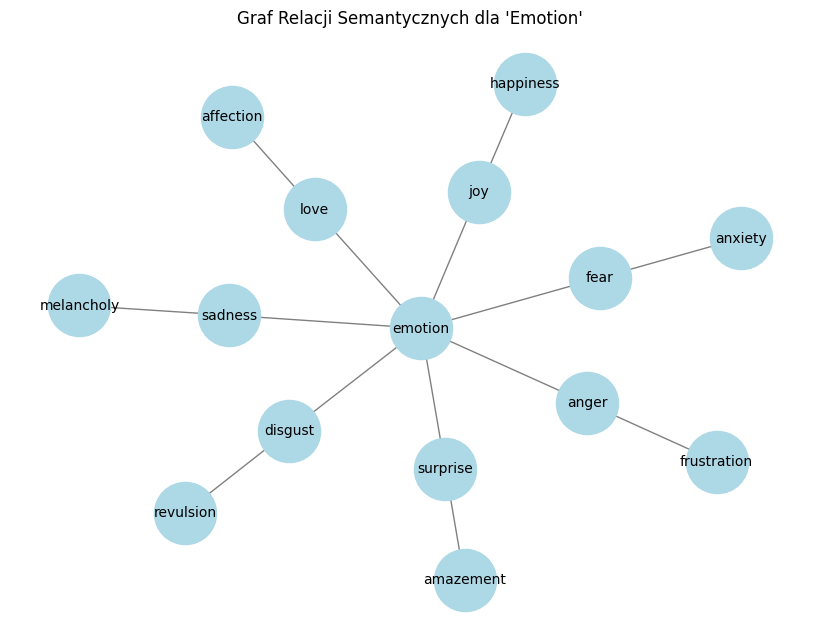


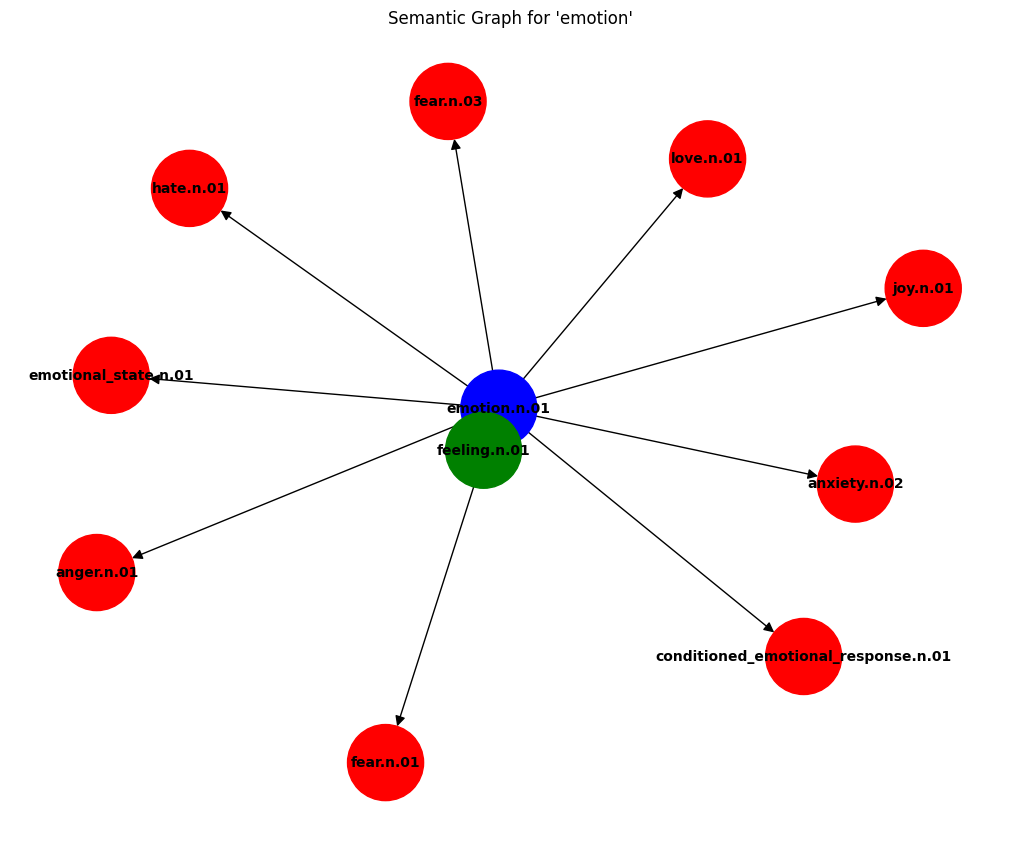

In [136]:
def visualize_semantic_graph(word: str):
    synsets = wordnet.synsets(word)
    if not synsets:
        print(f"No synsets found for the word '{word}'.")
        return
    
    synset = synsets[0]
    
    G = nx.DiGraph()
    
    G.add_node(synset.name(), label=synset.name(), color="blue")
    
    for hypernym in synset.hypernyms():
        G.add_node(hypernym.name(), label=hypernym.name(), color="green")
        G.add_edge(hypernym.name(), synset.name())
    
    for hyponym in synset.hyponyms():
        G.add_node(hyponym.name(), label=hyponym.name(), color="red")
        G.add_edge(synset.name(), hyponym.name())
    
    node_colors = [G.nodes[node]["color"] for node in G.nodes]
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_size=3000, node_color=node_colors, font_size=10, font_weight="bold", arrowsize=15
    )
    plt.title(f"Semantic Graph for '{word}'")
    plt.show()

visualize_semantic_graph("emotion")




### <span style="color: magenta">Zadanie 5: Tematyka tekstu na podstawie dominujących słów i WordNetu</span> 🦭


- Wczytaj teksty z kolekcji book ( w dodatkowym wariancie 3 pliki tekstowe po polsku)
- Zastosuj tokenizację i tagowanie POS
- stwórz wykres ilości części mowy dla kazdego tekstu i wizualnie porównaj rozkłady
- Czy możliwe jest rozróżnienie typu tekstu na podstawie rozkładu części mowy?
- Zidentyfikuj i zlicz najczęstsze czasowniki, rzeczowniki i inne części mowy
- Stwórz zdania z najczęstszych słów 

    (zakładamy najprostszą gramatykę, a więc to że zdanie składa się z czasownika, rzeczownika i innej części mowy)
    
- Spróbuj odgadnąć tematykę tekstu na podstawie 3 "uogólnionych zdań"






In [171]:
#Kod zadania 5
import nltk
# nltk.download('book')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')
from nltk.book import *
from nltk import pos_tag, word_tokenize, FreqDist


In [ ]:
def analyze_text_v1(text: str) -> None:
    tokens = word_tokenize(" ".join(text.tokens))

    tagged = pos_tag(tokens)
        
    pos_nn_counts = FreqDist(tag for word, tag in tagged if tag.startswith('NN'))
    pos_vb_counts = FreqDist(tag for word, tag in tagged if tag.startswith('VB'))
    pos_others_counts = FreqDist(tag for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB') and (not tag.startswith('PUNK'))))

    plt.figure(figsize=(10, 6))
    pos_nn_counts.plot(30, title=f"POS NN Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_vb_counts.plot(30, title=f"POS VB Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_others_counts.plot(30, title=f"POS Otheres Distribution for {text.name}")
    plt.show()
    
    nouns = [word for word, tag in tagged if tag.startswith('NN')]
    verbs = [word for word, tag in tagged if tag.startswith('VB')]
    others = [word for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB'))]
    
    print(f"Most common nouns: {FreqDist(nouns).most_common(5)}")
    print(f"Most common verbs: {FreqDist(verbs).most_common(5)}")
    print(f"Most common others: {FreqDist(others).most_common(5)}")
    
    if nouns and verbs and others:
        sentence = f"{nouns[0]} {verbs[0]} {others[0]}"
        print(f"Generated sentence: {sentence}")
    else:
        print("Not enough data to generate a sentence.")
    print("\n")

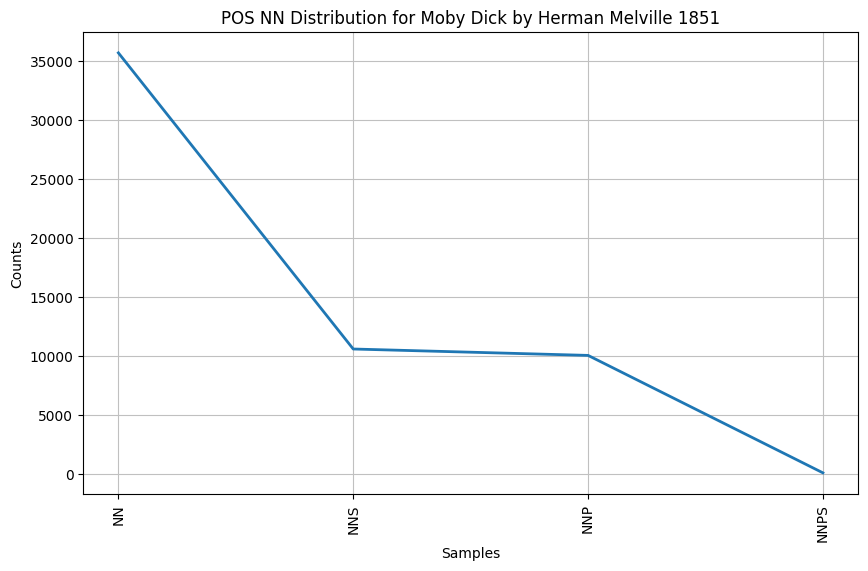

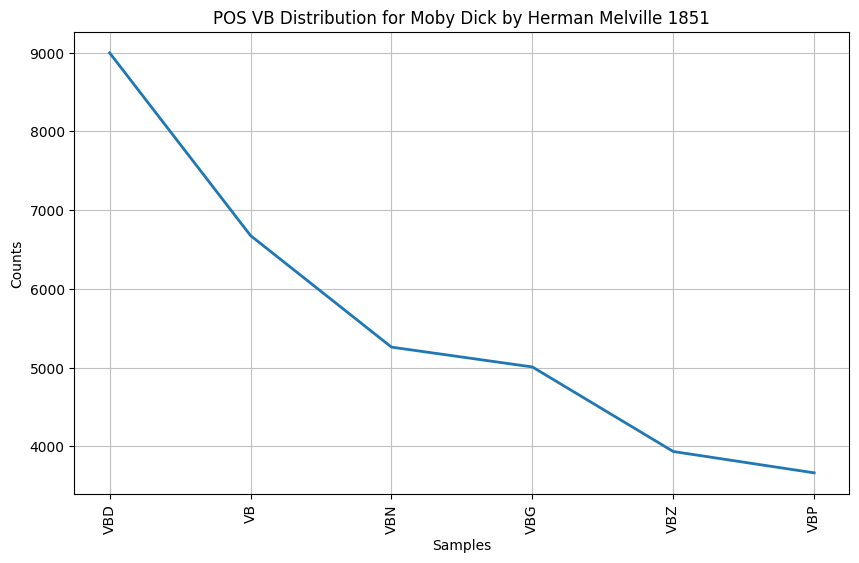

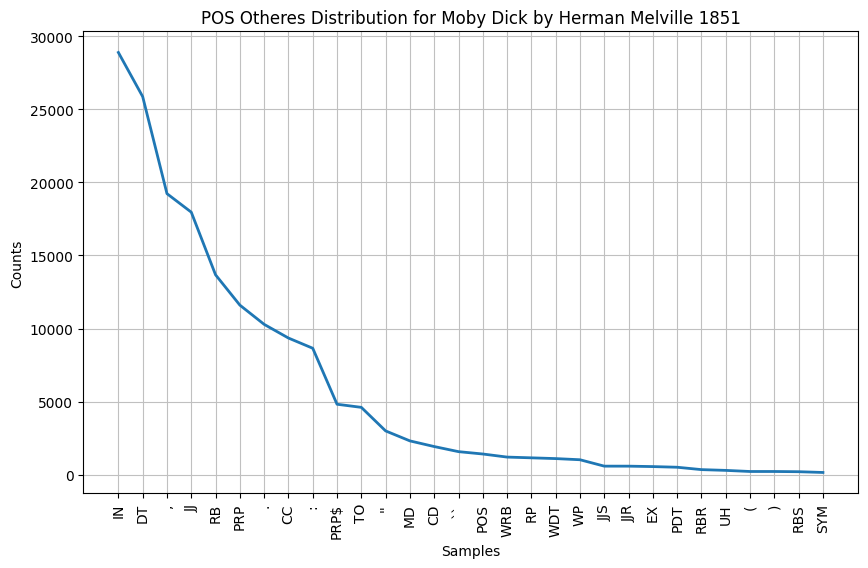

Most common nouns: [('s', 847), ('whale', 732), ('man', 508), ('Ahab', 498), ('ship', 487)]
Most common verbs: [('is', 1695), ('was', 1632), ('be', 1030), ('had', 767), ('have', 760)]
Most common others: [(',', 19229), ('the', 13721), ('.', 7514), ('of', 6536), ('and', 6024)]
Generated sentence: Moby Supplied [




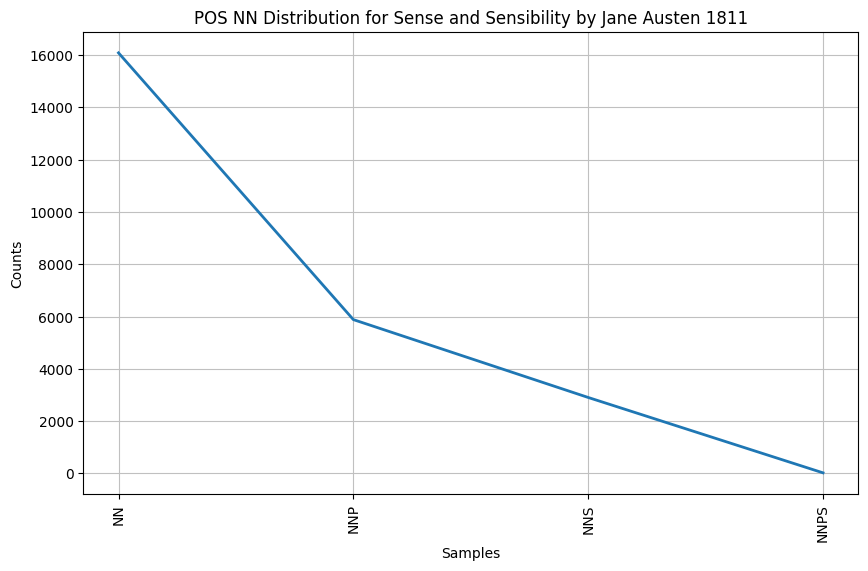

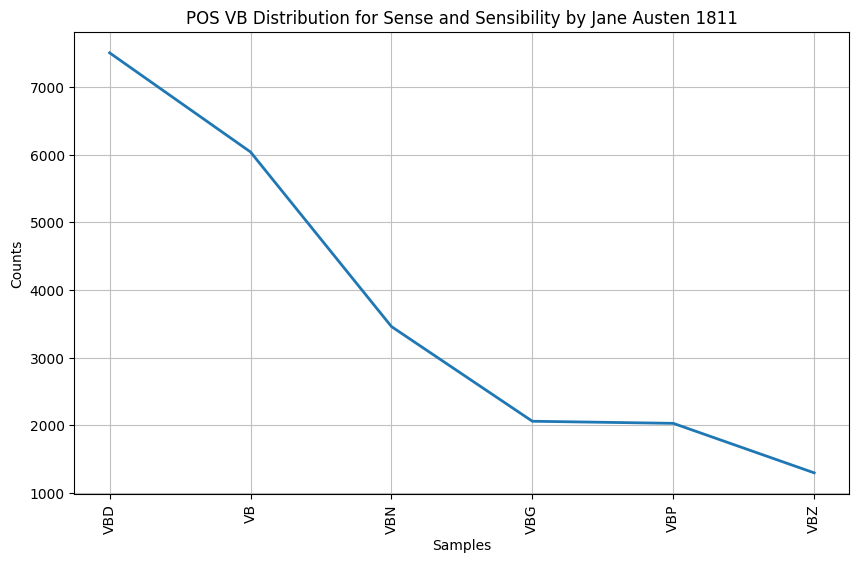

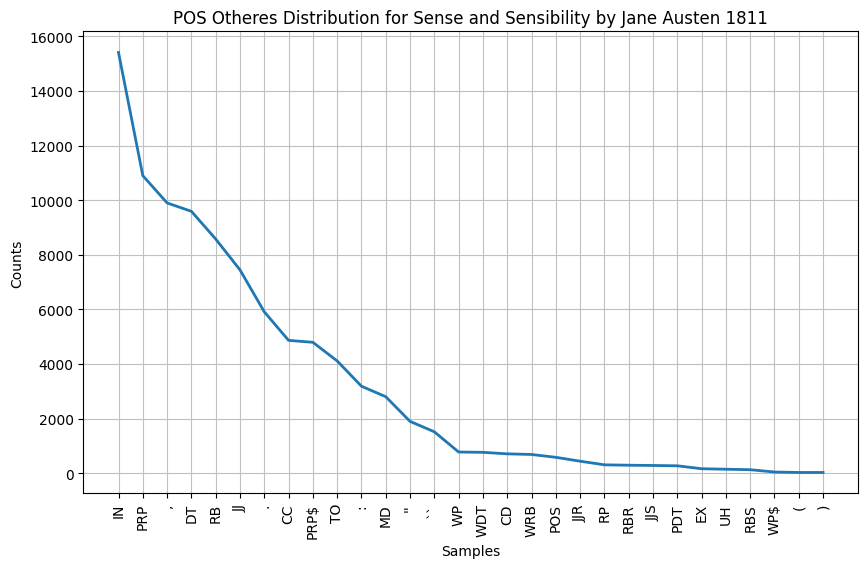

Most common nouns: [('Elinor', 677), ('Marianne', 564), ('Mrs', 530), ('s', 376), ('sister', 272)]
Most common verbs: [('was', 1846), ('be', 1305), ('had', 969), ('have', 807), ('is', 728)]
Most common others: [(',', 9901), ('.', 4902), ('to', 4063), ('the', 3861), ('of', 3565)]
Generated sentence: Sense had [




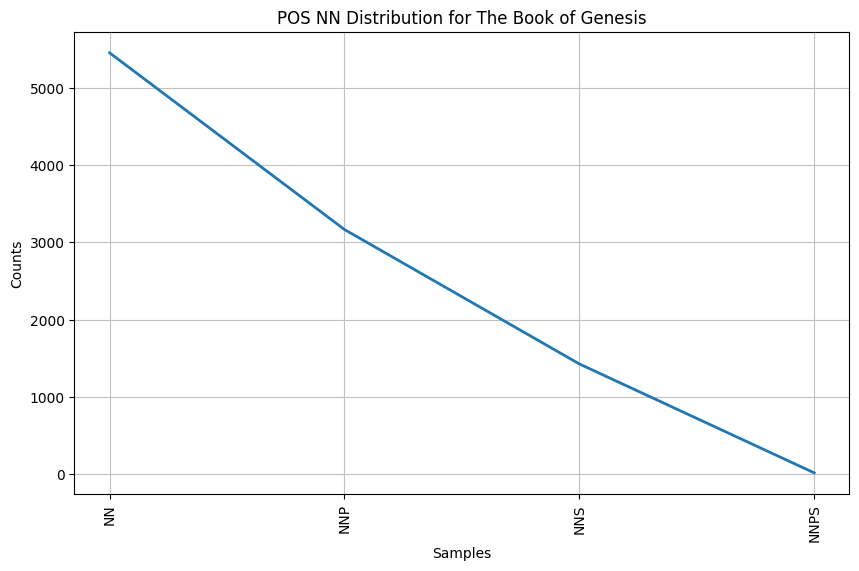

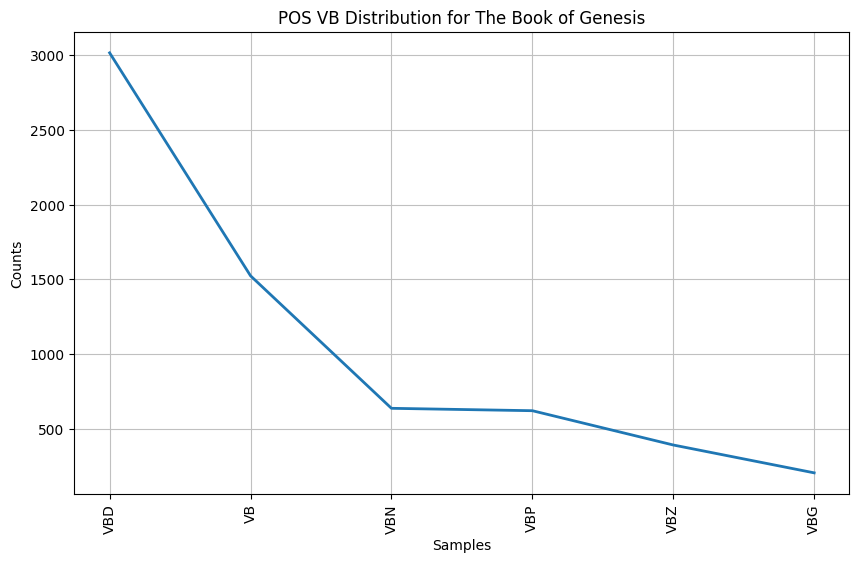

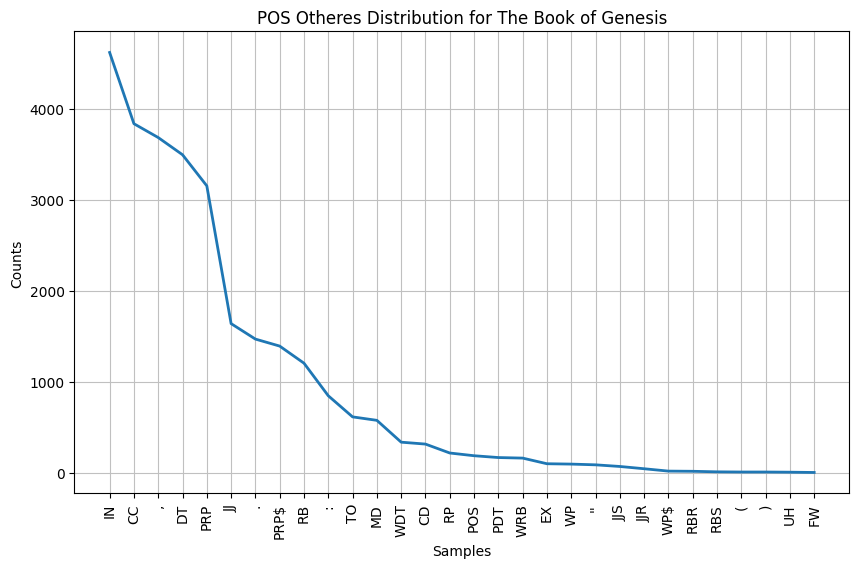

Most common nouns: [('God', 231), ('father', 197), ('land', 184), ('Jacob', 177), ('LORD', 166)]
Most common verbs: [('said', 476), ('was', 317), ('is', 267), ('be', 254), ('came', 177)]
Most common others: [(',', 3682), ('and', 2428), ('the', 2411), ('of', 1358), ('.', 1316)]
Generated sentence: beginning created In




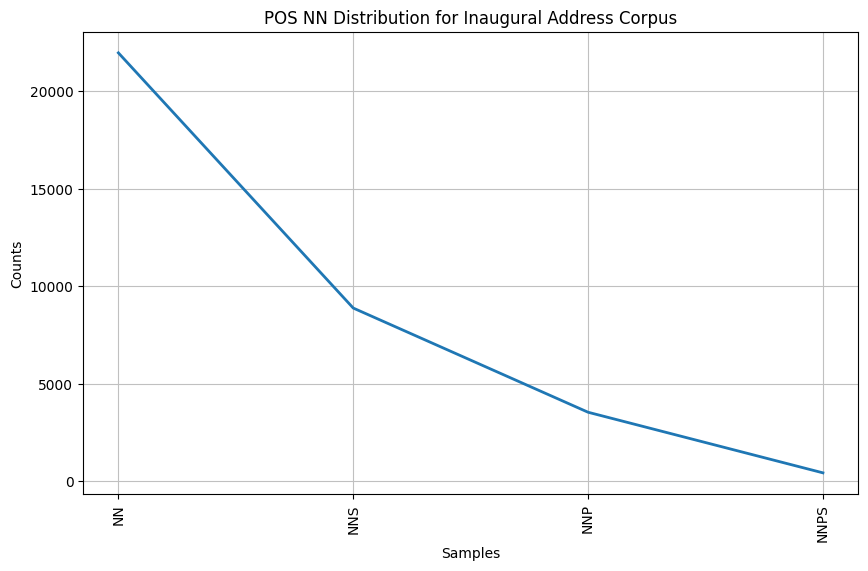

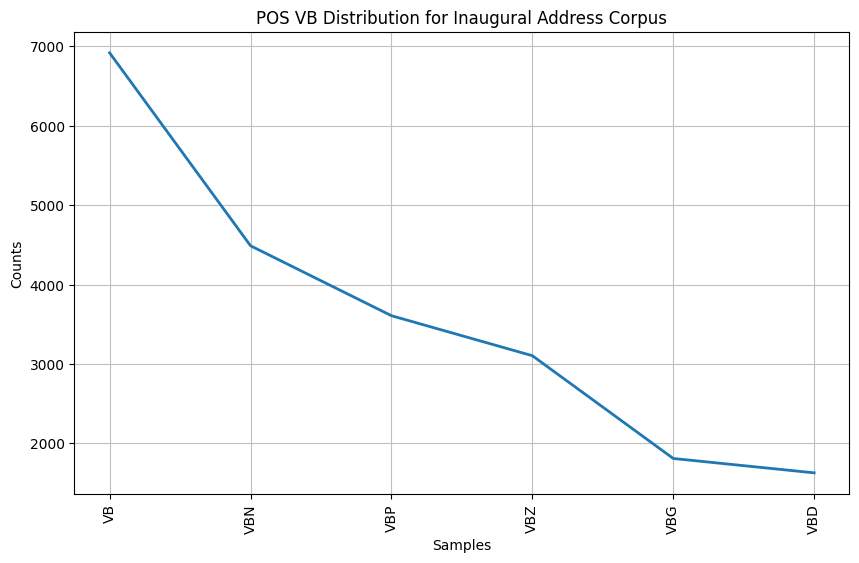

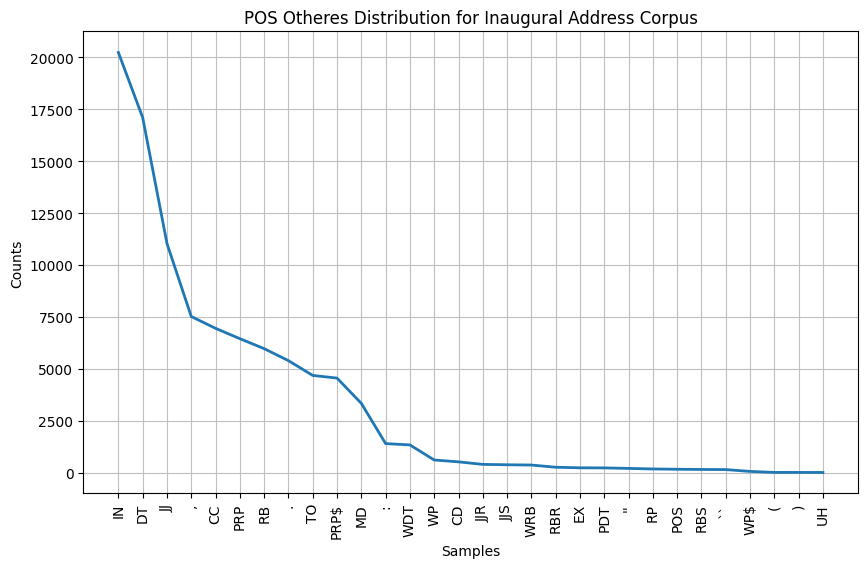

Most common nouns: [('people', 597), ('world', 337), ('States', 336), ('Government', 334), ('country', 330)]
Most common verbs: [('be', 1545), ('is', 1506), ('have', 1047), ('are', 836), ('has', 644)]
Most common others: [('the', 9670), (',', 7523), ('of', 7260), ('and', 5356), ('.', 5262)]
Generated sentence: Fellow have -




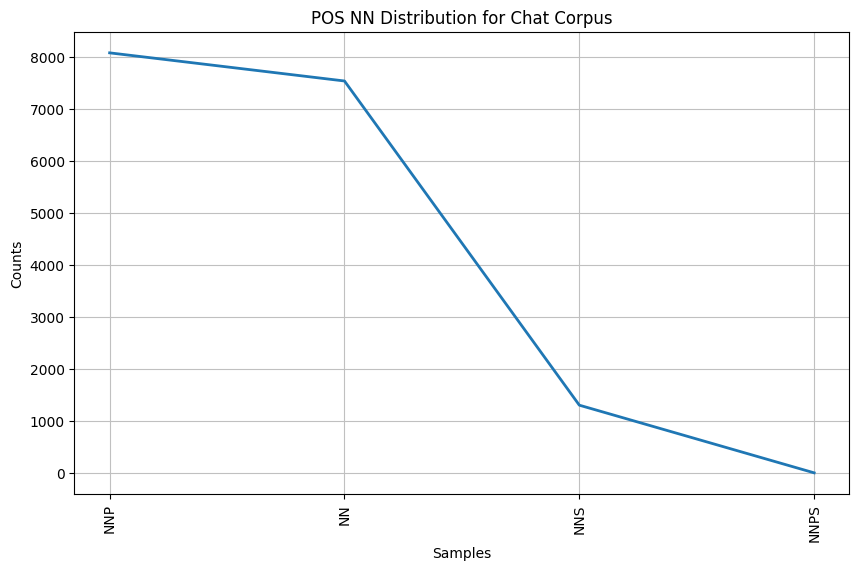

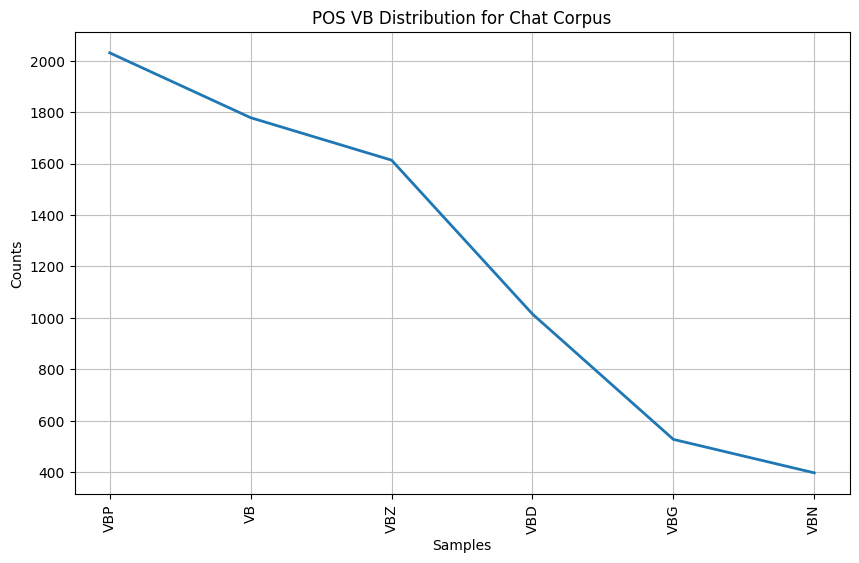

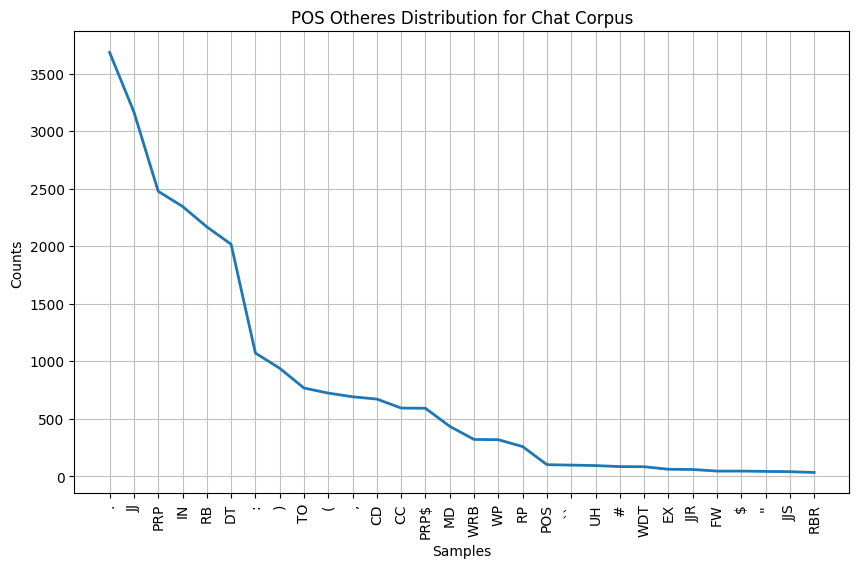

Most common nouns: [('JOIN', 1014), ('PART', 994), ('i', 397), ('hi', 387), ('ACTION', 330)]
Most common verbs: [('is', 372), ('lol', 199), ('are', 178), ('do', 167), ('have', 164)]
Most common others: [('.', 1435), ('!', 1145), ('?', 1103), (')', 938), ('(', 722)]
Generated sentence: gay im now




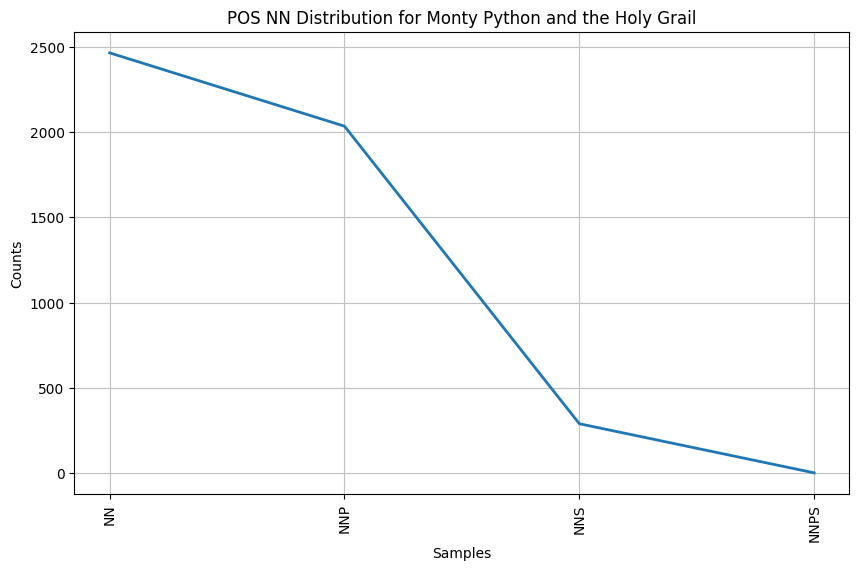

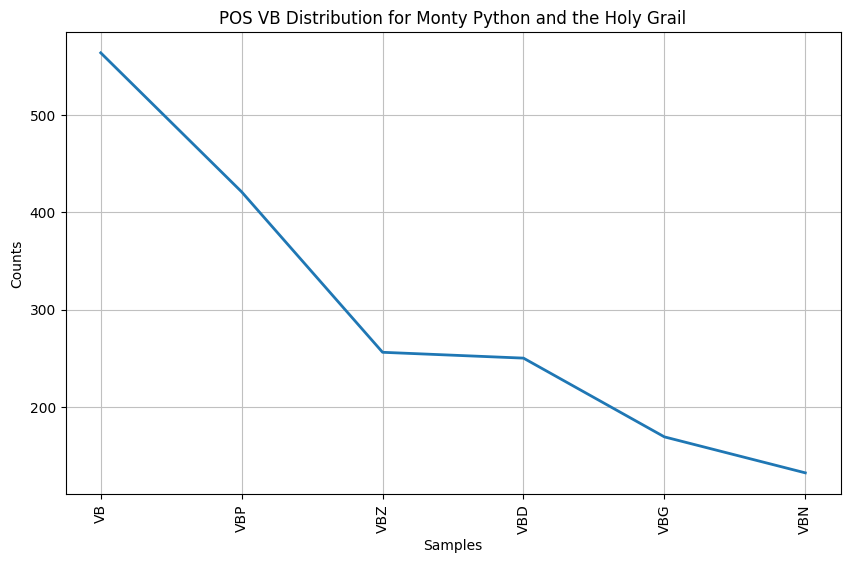

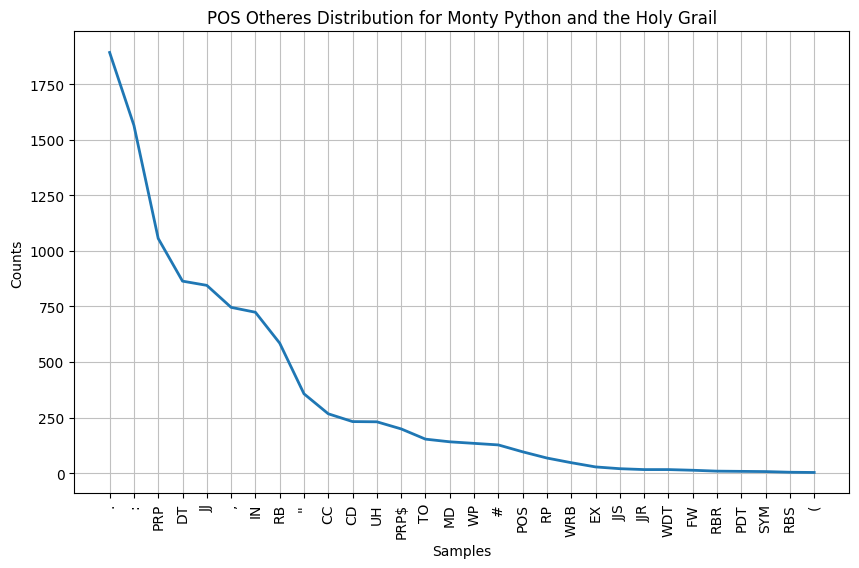

Most common nouns: [(']', 243), ('[', 221), ('ARTHUR', 221), ('LAUNCELOT', 71), ('KNIGHT', 68)]
Most common verbs: [('is', 106), ('s', 54), ('have', 53), ('are', 52), ('be', 43)]
Most common others: [(':', 1197), ('.', 840), ('!', 830), (',', 746), ("'", 449)]
Generated sentence: SCENE goes 1




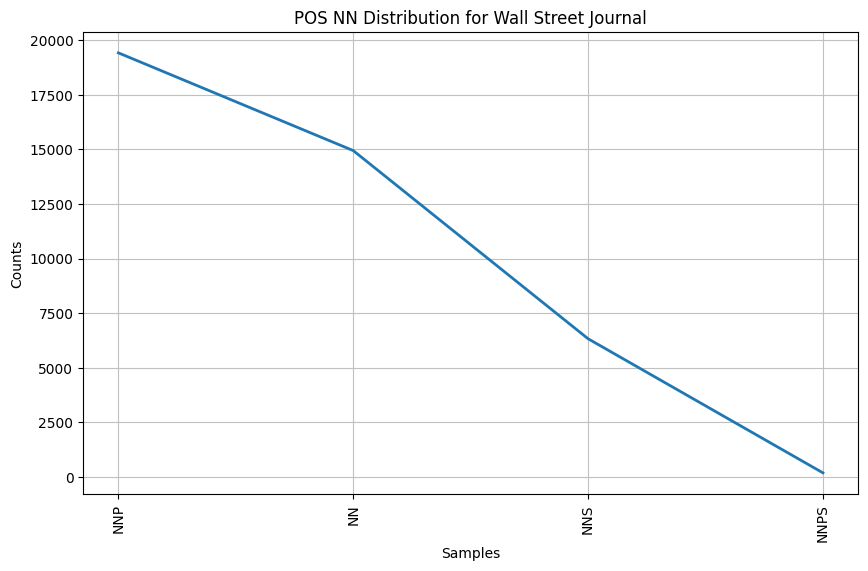

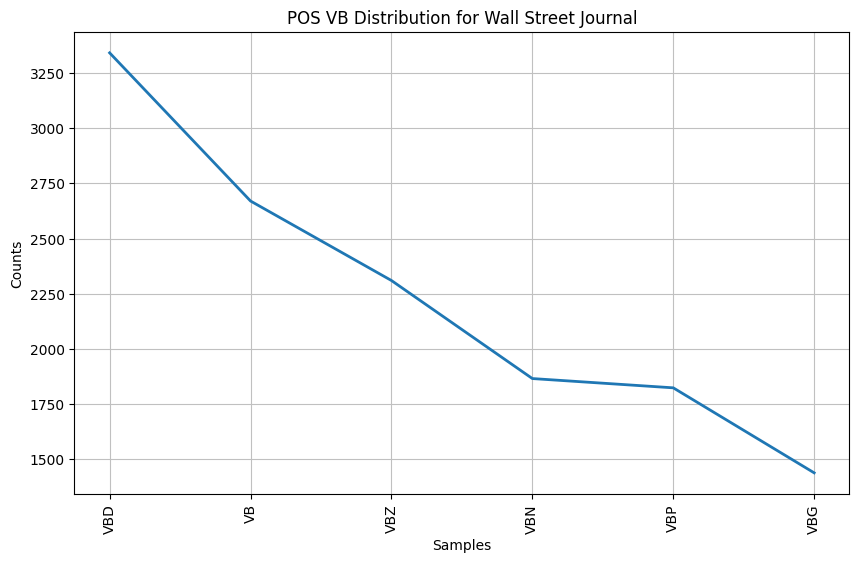

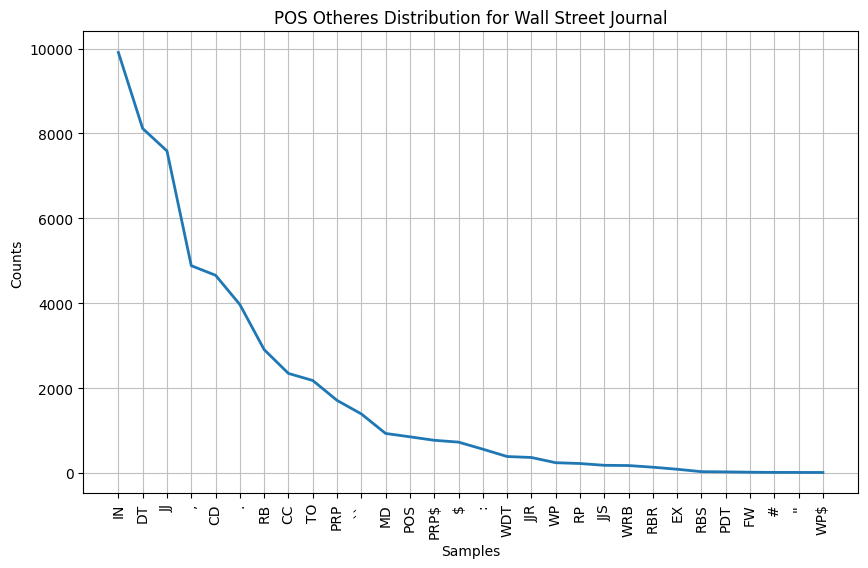

Most common nouns: [('*', 5580), ('-1', 1922), ('T', 1613), ('U', 744), ('-2', 715)]
Most common verbs: [('*', 1048), ('is', 671), ('said', 628), ('are', 369), ('was', 367)]
Most common others: [(',', 4885), ('the', 4045), ('.', 3879), ('of', 2319), ('to', 2164)]
Generated sentence: Pierre join ,




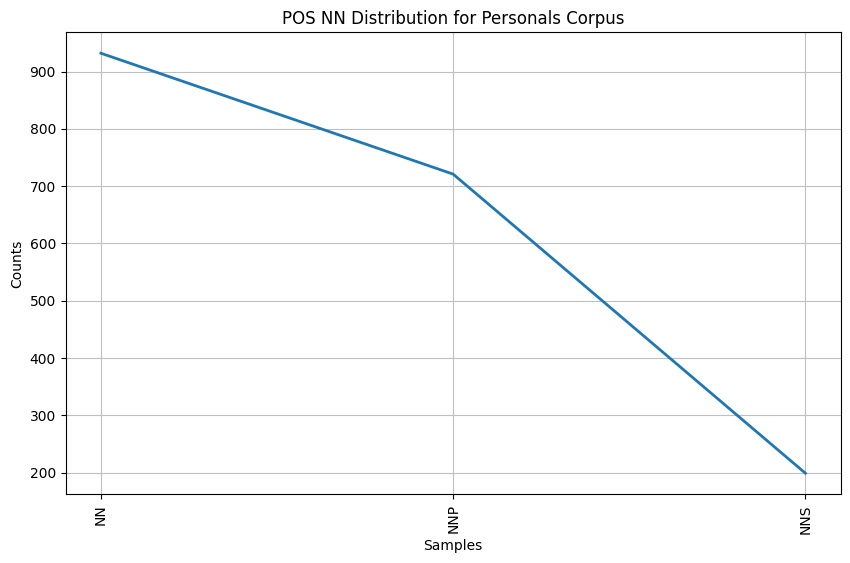

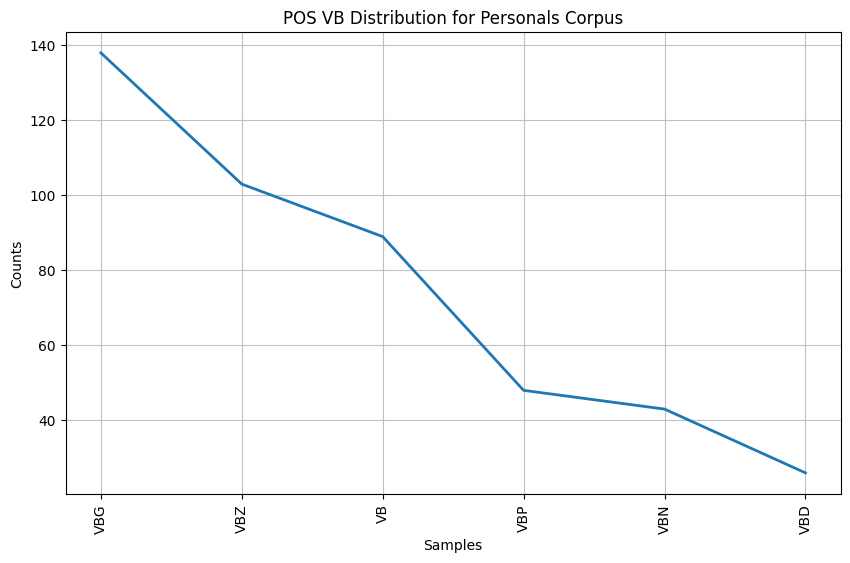

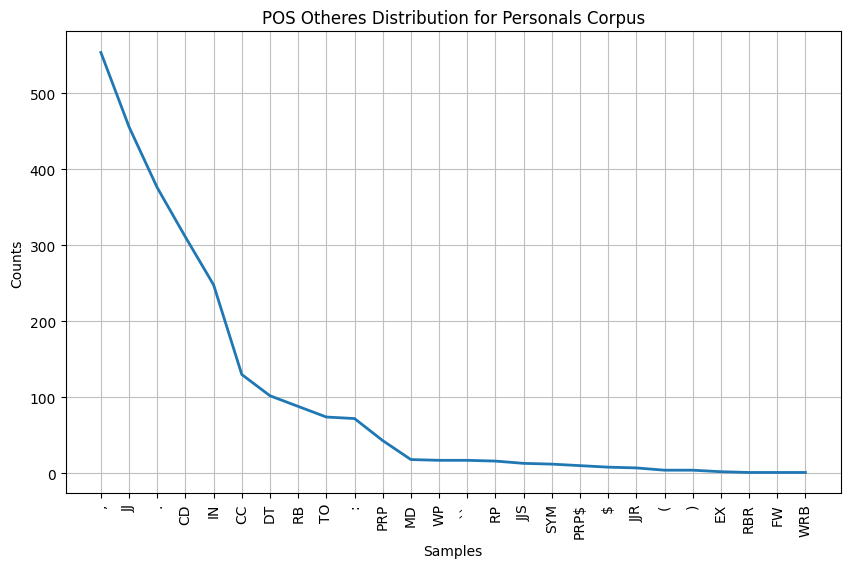

Most common nouns: [('/', 99), ('lady', 60), ('S', 36), ('ship', 33), ('relationship', 29)]
Most common verbs: [('seeks', 51), ('looking', 18), ('dining', 16), ('meet', 15), ('seeking', 14)]
Most common others: [(',', 554), ('.', 364), ('for', 99), ('and', 74), ('to', 74)]
Generated sentence: SEXY seeks 25




In [ ]:
for text in [text1, text2, text3, text4, text5, text6, text7, text8]:
    analyze_text_v1(text)




### <span style="color: aqua">Zadanie 6 : poprawa jakości danych w celu ulepszenia wyników</span> 🦩
* Należy wyeliminować z korpusu słowa nie istotne pod kątem analizy semantycznej czyli  np. uwzględnić standardową listę stop words, (w razie potrzeby można ją modyfikować) . Prosze pamiętać że słowa do porównania z lista musza być w  lowercase

* Należy ponownie stworzyć zdania tym razem dla wyczyszczonych danych

        Czy tematyka tych zdań jest podobna?
        Czy można z nich wnioskować o temacie dokumentu?

Przypomnienie :

Można użyć pakietu NLTK, lista stopwords jest dostępna w 16 językach i można ją obejrzeć w katalogu
nltk_data/corpora/stopwords  

Można też po prostu ją wyświetlić (tak jak poniżej)

In [201]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

# kod Zadania 6
# poprawiamy zadanie tu żeby było widac zmiany ( najlepiej przekleić kod :)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mchojna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def analyze_text_v2(text: str) -> None:
    text_ = [word for word in text.tokens if word not in stopwords.words('english')]
    
    tokens = word_tokenize(" ".join(text_))

    tagged = pos_tag(tokens)
        
    pos_nn_counts = FreqDist(tag for word, tag in tagged if tag.startswith('NN'))
    pos_vb_counts = FreqDist(tag for word, tag in tagged if tag.startswith('VB'))
    pos_others_counts = FreqDist(tag for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB') and (not tag.startswith('PUNK'))))

    plt.figure(figsize=(10, 6))
    pos_nn_counts.plot(30, title=f"POS NN Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_vb_counts.plot(30, title=f"POS VB Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_others_counts.plot(30, title=f"POS Otheres Distribution for {text.name}")
    plt.show()
    
    nouns = [word for word, tag in tagged if tag.startswith('NN')]
    verbs = [word for word, tag in tagged if tag.startswith('VB')]
    others = [word for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB'))]
    
    print(f"Most common nouns: {FreqDist(nouns).most_common(5)}")
    print(f"Most common verbs: {FreqDist(verbs).most_common(5)}")
    print(f"Most common others: {FreqDist(others).most_common(5)}")
    
    if nouns and verbs and others:
        sentence = f"{nouns[0]} {verbs[0]} {others[0]}"
        print(f"Generated sentence: {sentence}")
    else:
        print("Not enough data to generate a sentence.")
    print("\n")

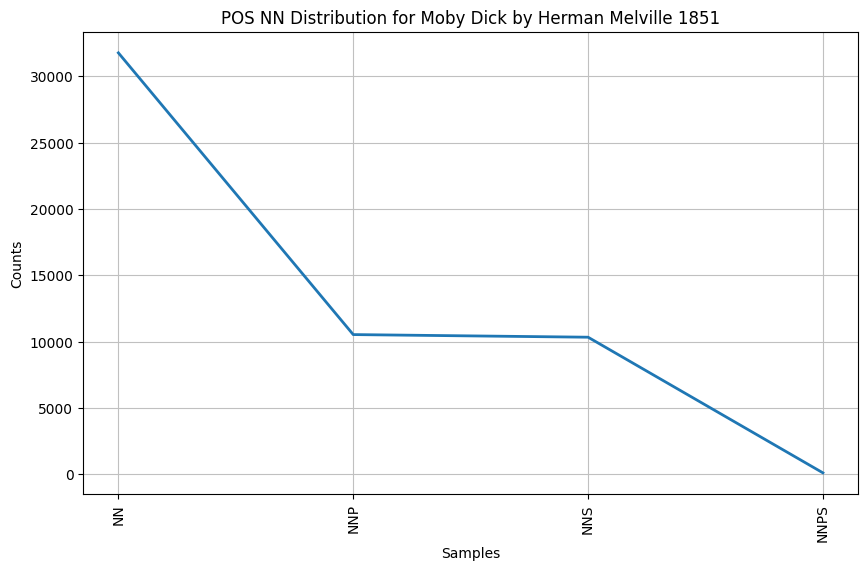

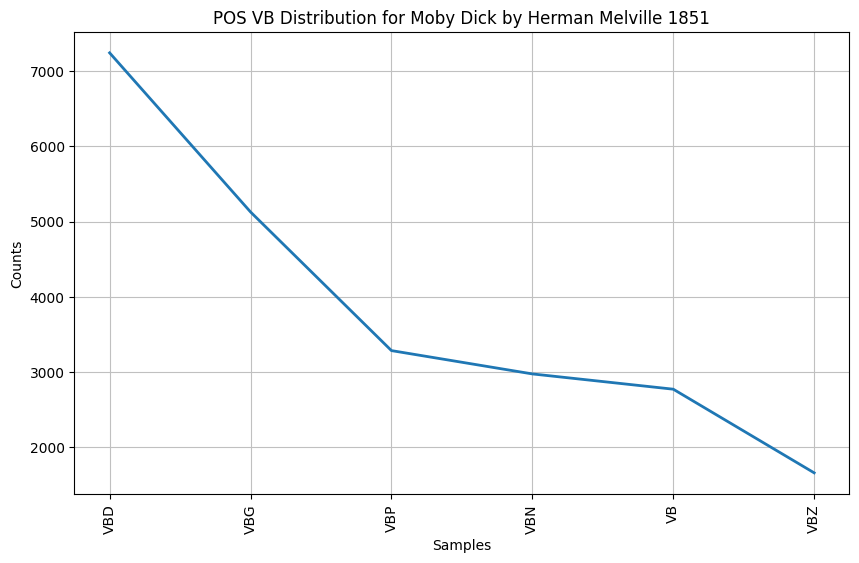

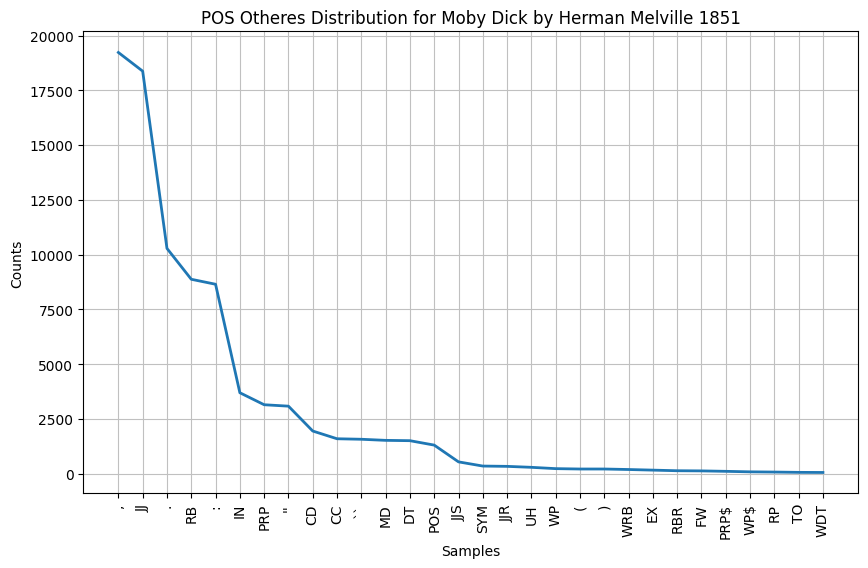

Most common nouns: [('whale', 555), ('man', 508), ('Ahab', 499), ('ship', 420), ('sea', 408)]
Most common verbs: [('said', 302), ('seemed', 275), ('say', 233), ('see', 193), ('made', 178)]
Most common others: [(',', 19229), ('.', 7514), (';', 4173), ("'", 2894), ('-', 2555)]
Generated sentence: Moby see [




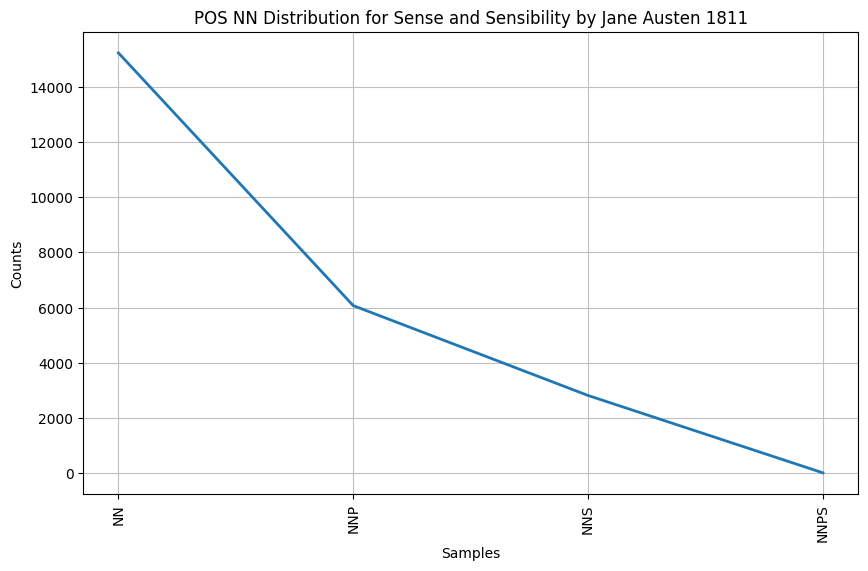

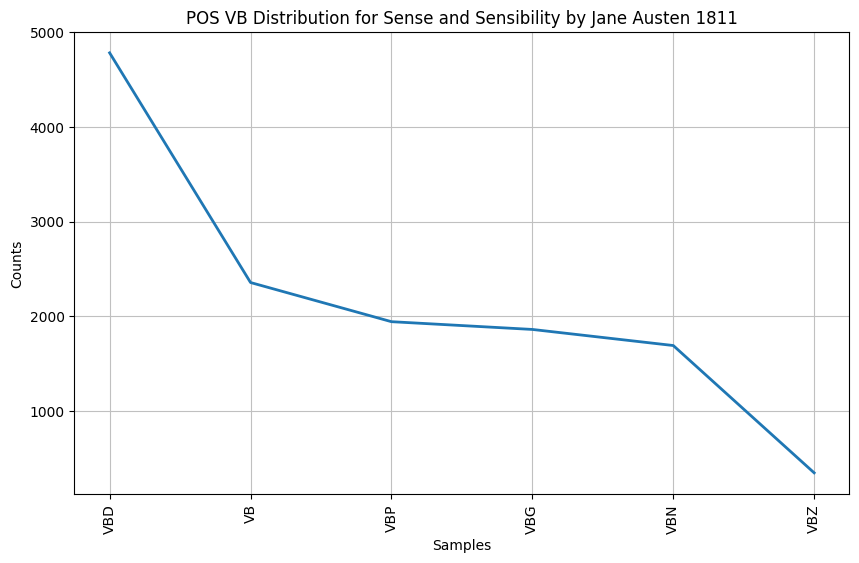

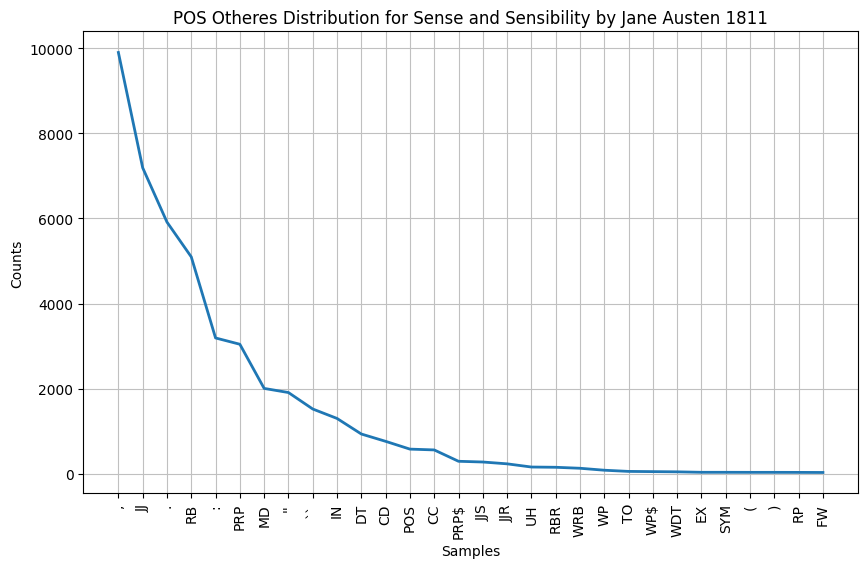

Most common nouns: [('Elinor', 674), ('Marianne', 565), ('Mrs', 530), ('Edward', 262), ('Dashwood', 252)]
Most common verbs: [('said', 397), ('know', 198), ('think', 190), ('say', 145), ('made', 138)]
Most common others: [(',', 9901), ('.', 4902), ('I', 2004), (';', 1572), ("''", 1564)]
Generated sentence: Sense settled [




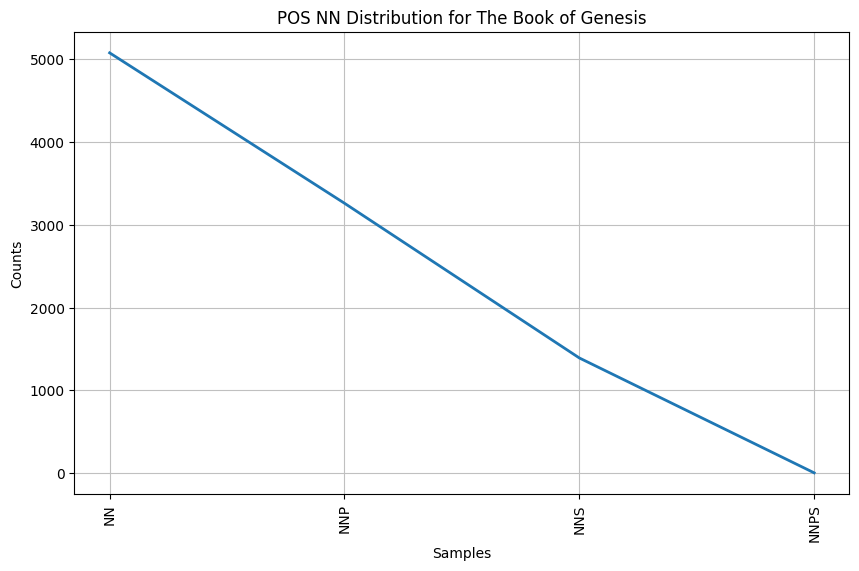

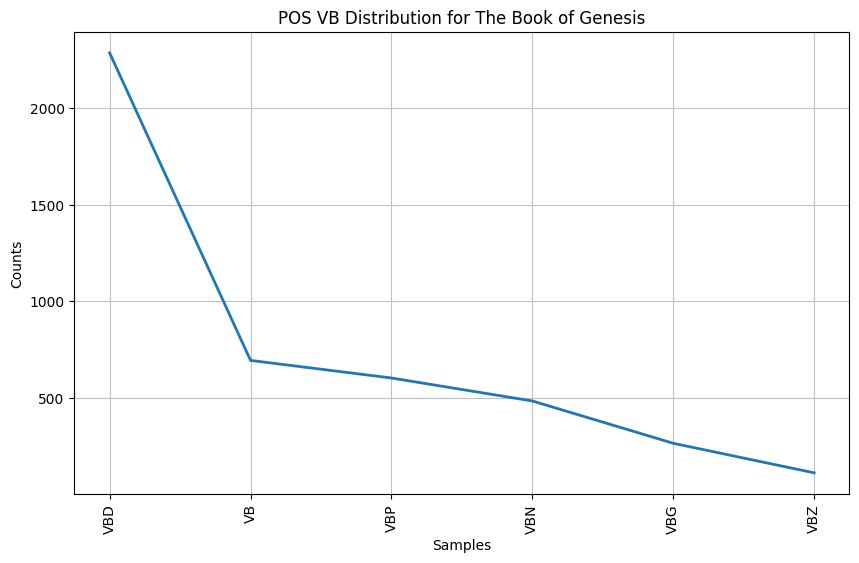

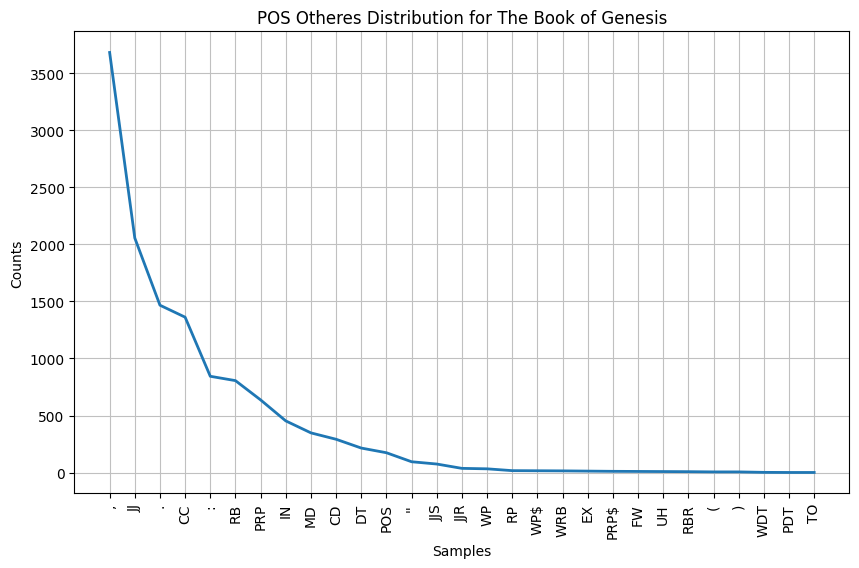

Most common nouns: [('God', 229), ('Jacob', 179), ('land', 163), ('LORD', 163), ('Joseph', 157)]
Most common verbs: [('said', 476), ('came', 177), ('went', 110), ('called', 98), ('took', 81)]
Most common others: [(',', 3682), ('.', 1316), ('And', 1250), (';', 606), ('unto', 505)]
Generated sentence: God beginning In




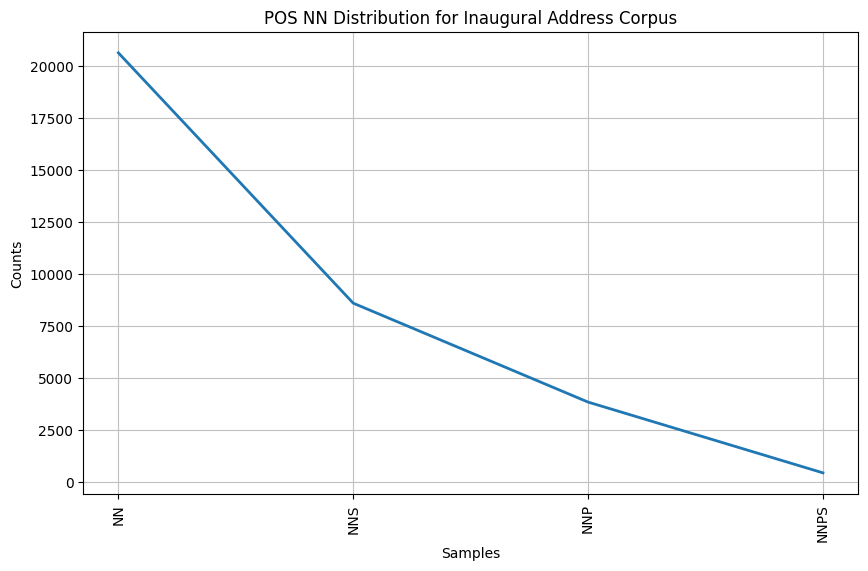

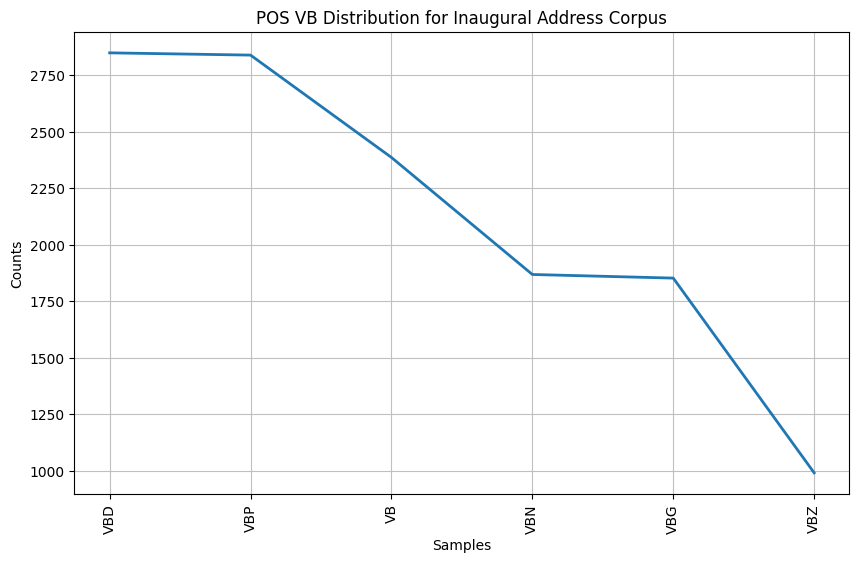

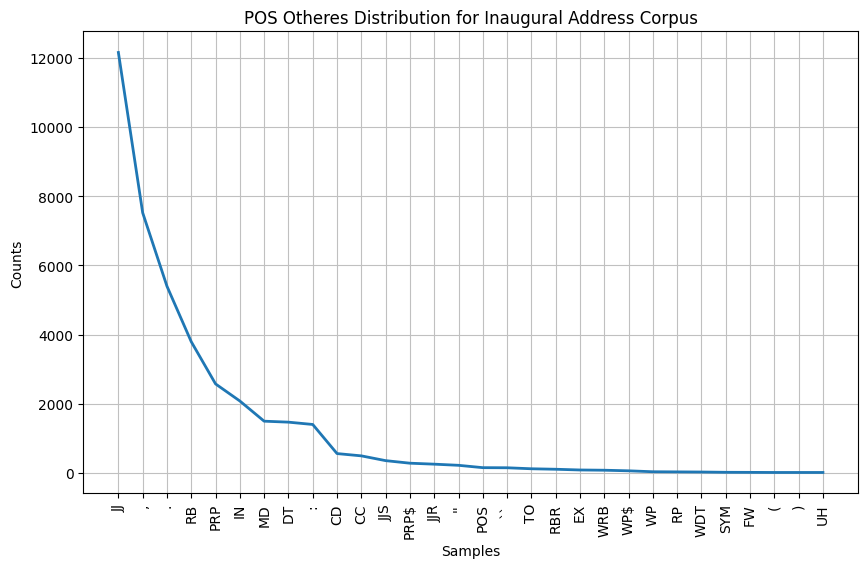

Most common nouns: [('people', 597), ('world', 337), ('States', 333), ('Government', 333), ('country', 330)]
Most common verbs: [('made', 158), ('make', 133), ('know', 102), ('let', 80), ('believe', 78)]
Most common others: [(',', 7523), ('.', 5262), ('I', 915), ('The', 645), ('We', 583)]
Generated sentence: Fellow Representatives -




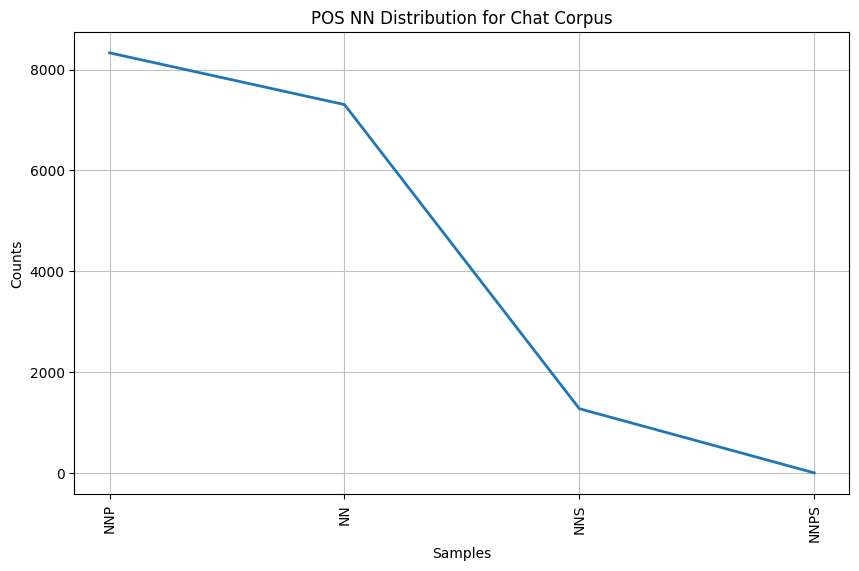

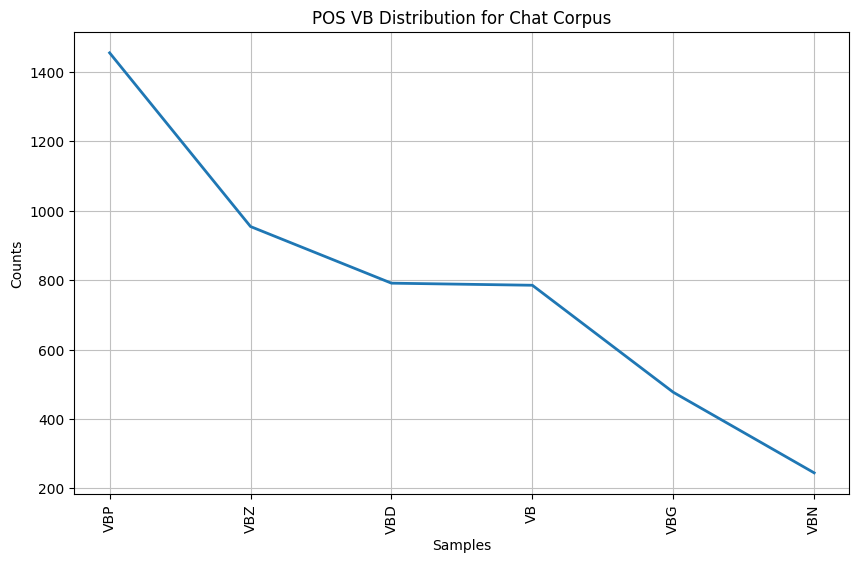

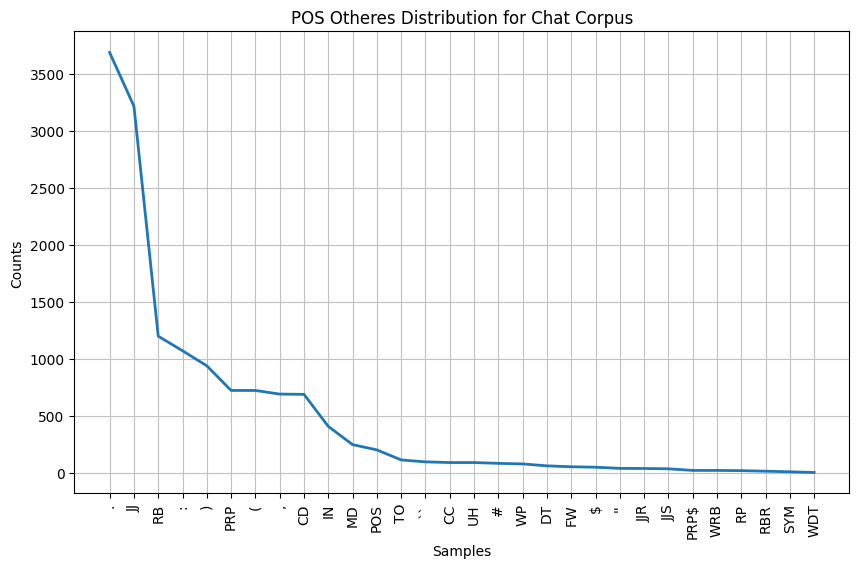

Most common nouns: [('JOIN', 1014), ('PART', 1006), ('hi', 396), ('ACTION', 340), ('lol', 325)]
Most common verbs: [('lol', 167), ("'m", 135), ('know', 90), ('hi', 83), ('got', 79)]
Most common others: [('.', 1437), ('!', 1145), ('?', 1103), (')', 938), ('(', 722)]
Generated sentence: im left gay




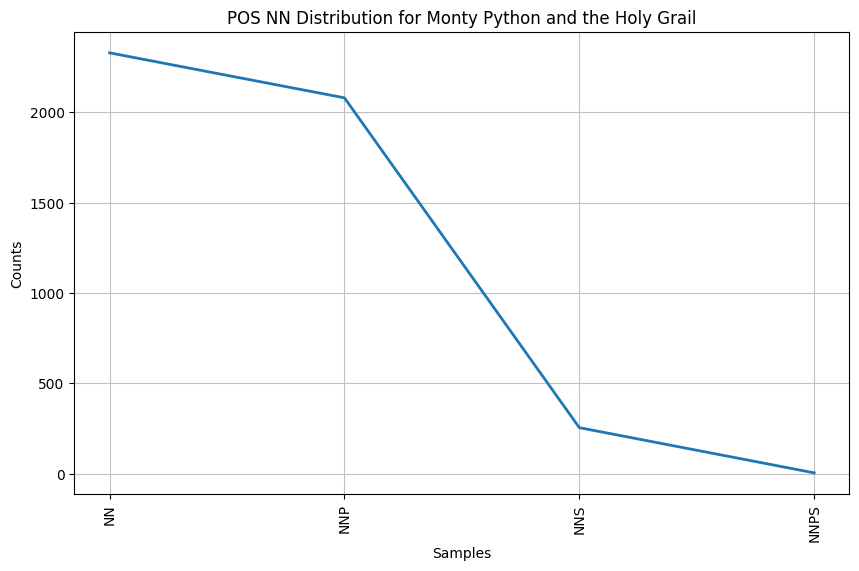

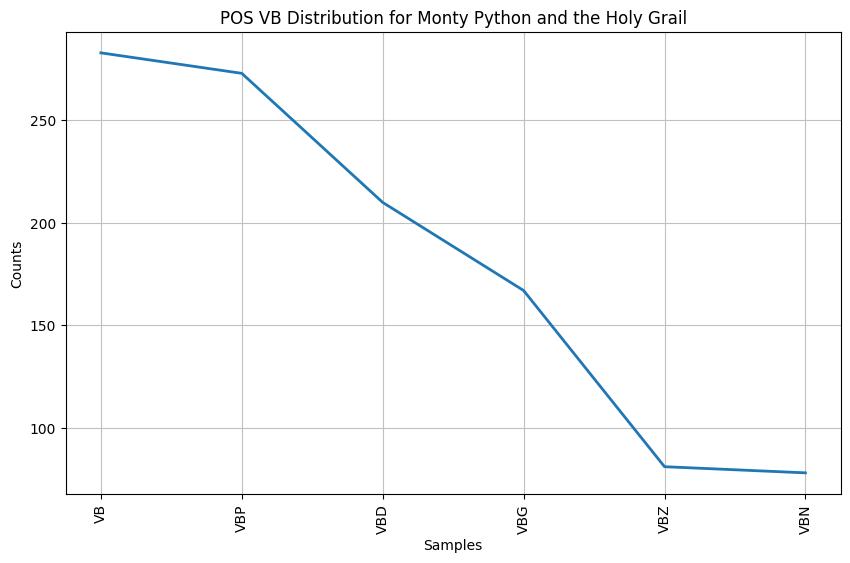

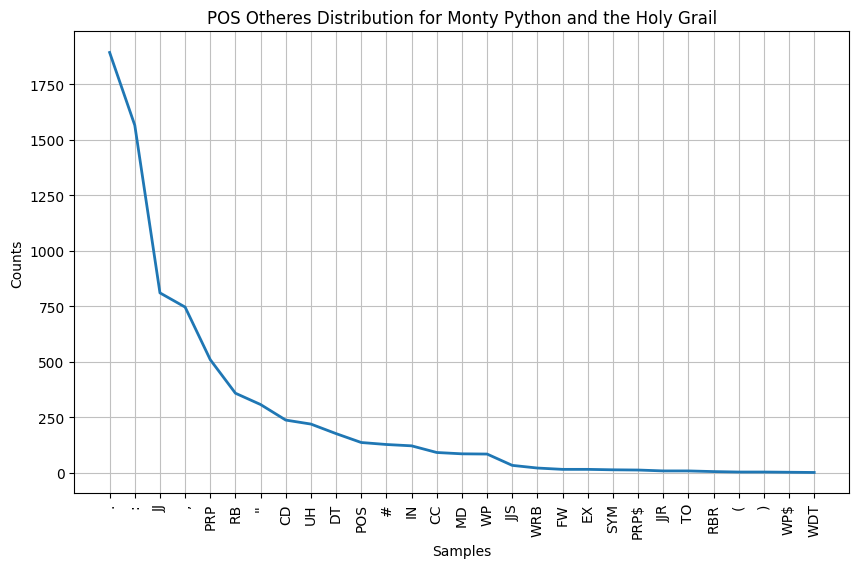

Most common nouns: [(']', 243), ('ARTHUR', 225), ('[', 222), ('LAUNCELOT', 72), ('KNIGHT', 68)]
Most common verbs: [('singing', 30), ('got', 27), ('going', 22), ('go', 21), ('think', 17)]
Most common others: [(':', 1197), ('.', 840), ('!', 830), (',', 746), ("'", 445)]
Generated sentence: SCENE goes 1




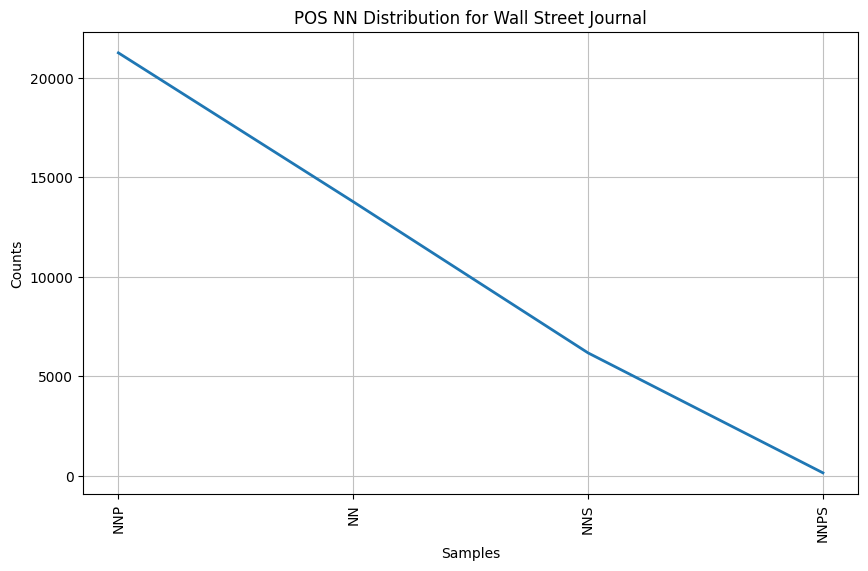

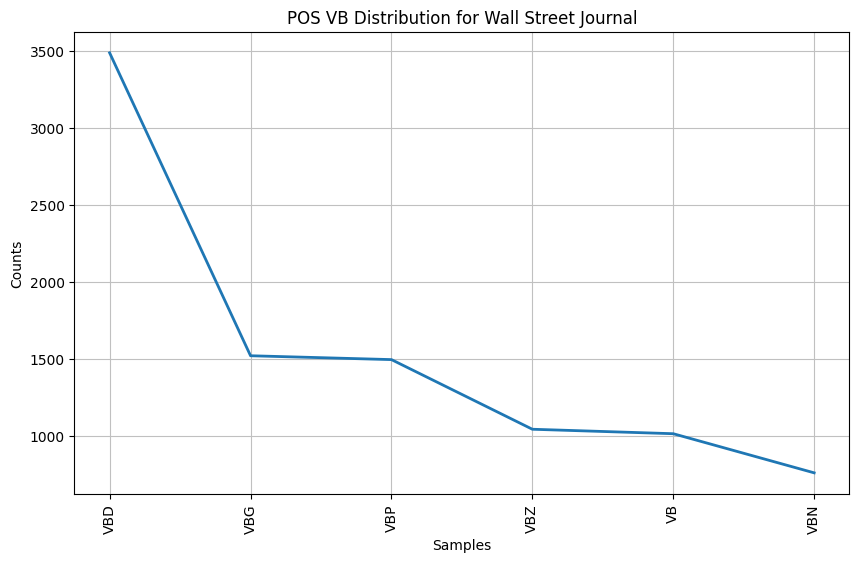

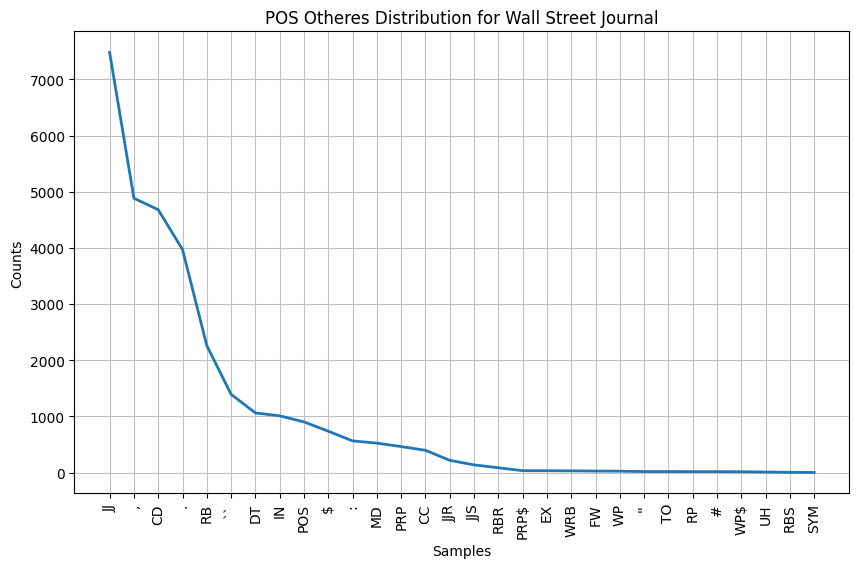

Most common nouns: [('*', 6265), ('-1', 1918), ('T', 1613), ('U', 744), ('-2', 712)]
Most common verbs: [('said', 628), ('*', 559), ('says', 210), ('say', 75), ('make', 71)]
Most common others: [(',', 4885), ('.', 3881), ('``', 1383), ('*', 1281), ('0', 1098)]
Generated sentence: Pierre join ,




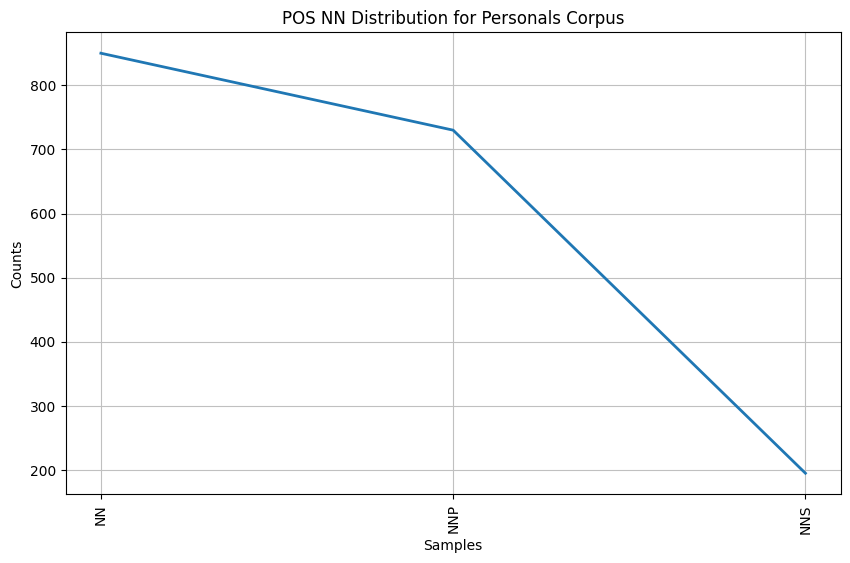

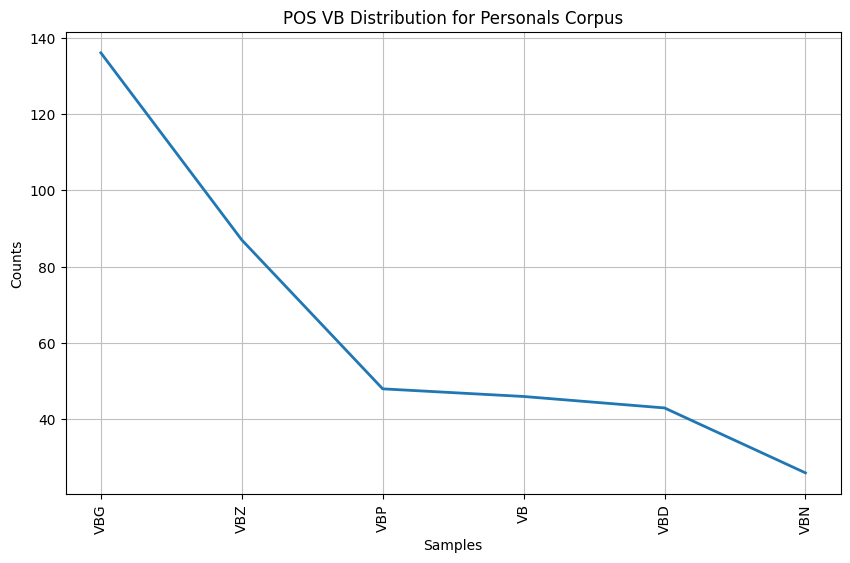

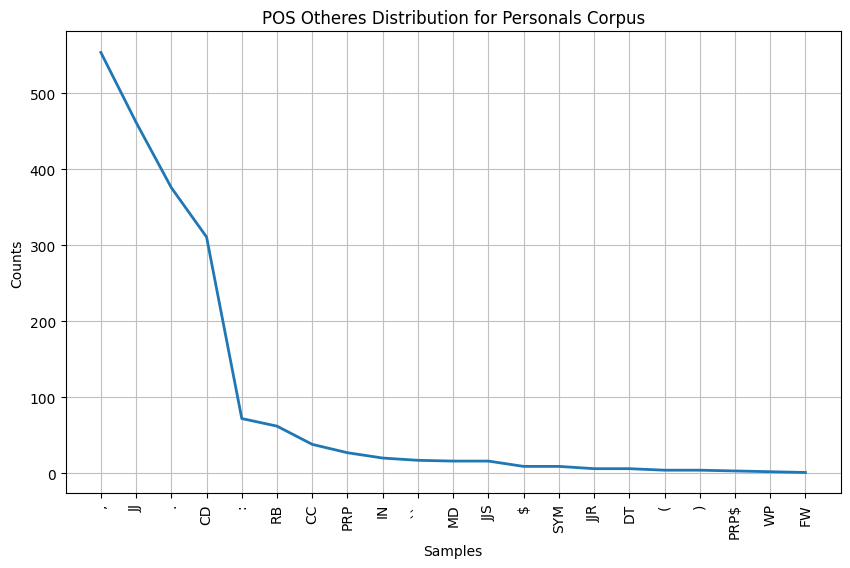

Most common nouns: [('/', 97), ('lady', 49), ('S', 36), ('ship', 33), ('relationship', 29)]
Most common verbs: [('seeks', 47), ('looking', 18), ('dining', 15), ('seeking', 14), ('like', 13)]
Most common others: [(',', 554), ('.', 364), ('-', 66), ('&', 30), ('50', 23)]
Generated sentence: SEXY seeks 25




In [205]:
for text in [text1, text2, text3, text4, text5, text6, text7, text8]:
    analyze_text_v2(text)

### <span style="color: lime">Zadanie 7: uogólnienie semantyczne w celu poprawy wyników</span> 🐧
Powtórz dodając przed tworzeniem zdania etap(albo w innym miejscu jeżeli wydaje się to korzystniejsze) :
- Uogólnij słownictwo za pomocą synonimów z WordNetu 

In [232]:
def generalize_word(word: str) -> list:
    if wordnet.synsets(word):
        synsets = wordnet.synsets(word)
    else:
        return []
    hypernyms = []
    
    for synset in synsets:
        hypernyms.extend(synset.hypernyms())
    
    return [lemma.name() for hypernym in hypernyms for lemma in hypernym.lemmas()] if hypernyms else []


In [234]:
generalize_word("dog")

['canine',
 'canid',
 'domestic_animal',
 'domesticated_animal',
 'unpleasant_woman',
 'disagreeable_woman',
 'chap',
 'fellow',
 'feller',
 'fella',
 'lad',
 'gent',
 'blighter',
 'cuss',
 'bloke',
 'villain',
 'scoundrel',
 'sausage',
 'catch',
 'stop',
 'support',
 'pursue',
 'follow']

In [245]:
# kod zadania 7
from itertools import chain

def analyze_text_v3(text: str) -> None:
    text_ = [word for word in text.tokens if word not in stopwords.words('english')]
    
    tokens = word_tokenize(" ".join(text_))

    tagged = pos_tag(tokens)
        
    pos_nn_counts = FreqDist(tag for word, tag in tagged if tag.startswith('NN'))
    pos_vb_counts = FreqDist(tag for word, tag in tagged if tag.startswith('VB'))
    pos_others_counts = FreqDist(tag for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB') and (not tag.startswith('PUNK'))))

    plt.figure(figsize=(10, 6))
    pos_nn_counts.plot(30, title=f"POS NN Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_vb_counts.plot(30, title=f"POS VB Distribution for {text.name}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    pos_others_counts.plot(30, title=f"POS Otheres Distribution for {text.name}")
    plt.show()
    
    nouns = [word for word, tag in tagged if tag.startswith('NN')]
    verbs = [word for word, tag in tagged if tag.startswith('VB')]
    others = [word for word, tag in tagged if (not tag.startswith('NN')) and (not tag.startswith('VB') and (not tag.startswith('PUNK')))]
    
    print(f"Most common nouns: {FreqDist(nouns).most_common(5)}")
    print(f"Most common verbs: {FreqDist(verbs).most_common(5)}")
    print(f"Most common others: {FreqDist(others).most_common(5)}")
    
    if nouns and verbs and others:
        sentence = f"{nouns[0]} {verbs[0]} {others[0]}"
        print(f"Generated sentence: {sentence}")
    else:
        print("Not enough data to generate a sentence.")
    print("\n")
    
    most_common_nouns = FreqDist(nouns).most_common(5)
    most_common_verbs = FreqDist(verbs).most_common(5)
    most_common_others = FreqDist(others).most_common(5)
    
    generalized_nouns = list(chain.from_iterable([generalize_word(noun) for noun, _ in most_common_nouns]))
    generalized_verbs = list(chain.from_iterable([generalize_word(verb) for verb, _ in most_common_verbs]))
    generalized_others = list(chain.from_iterable([generalize_word(other) for other, _ in most_common_others]))
    
    print(f"Generalized nouns: {generalized_others}")
    print(f"Generalized verbs: {generalized_verbs}")
    print(f"Generalized others: {generalized_others}")
    
    if generalized_nouns and generalized_verbs and generalized_others:
        sentence = f"{generalized_nouns[0]} {generalized_verbs[0]} {generalized_others[0]}"
        print(f"Generated generalized sentence: {sentence}")
    else:
        print("Not enough data to generate a generalized sentence.")
    print("\n")

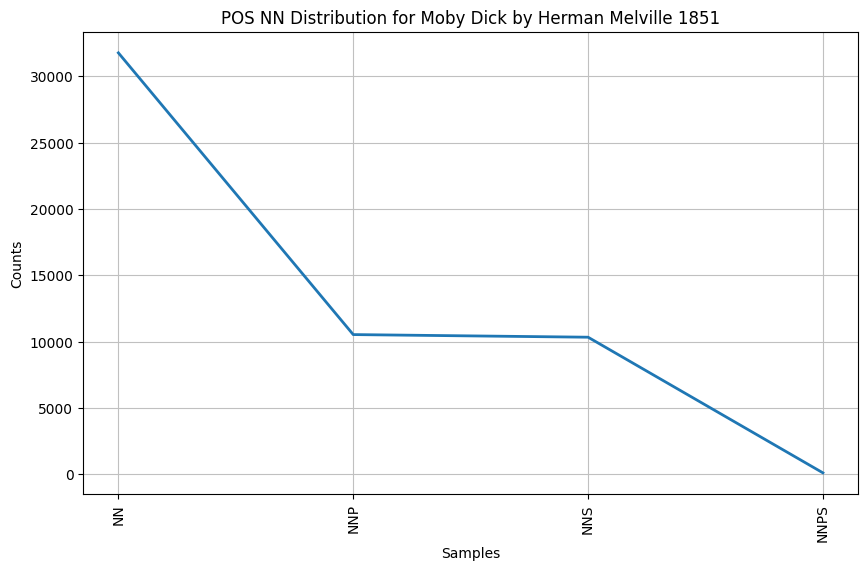

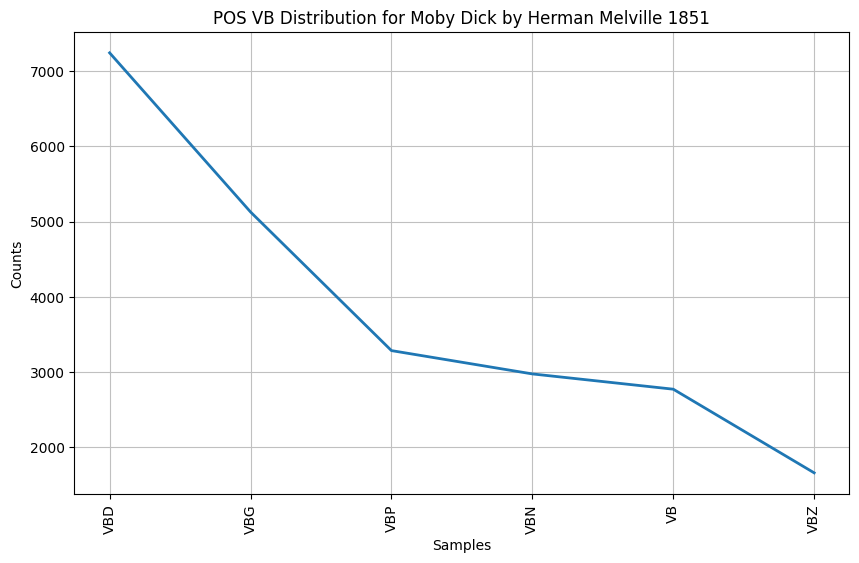

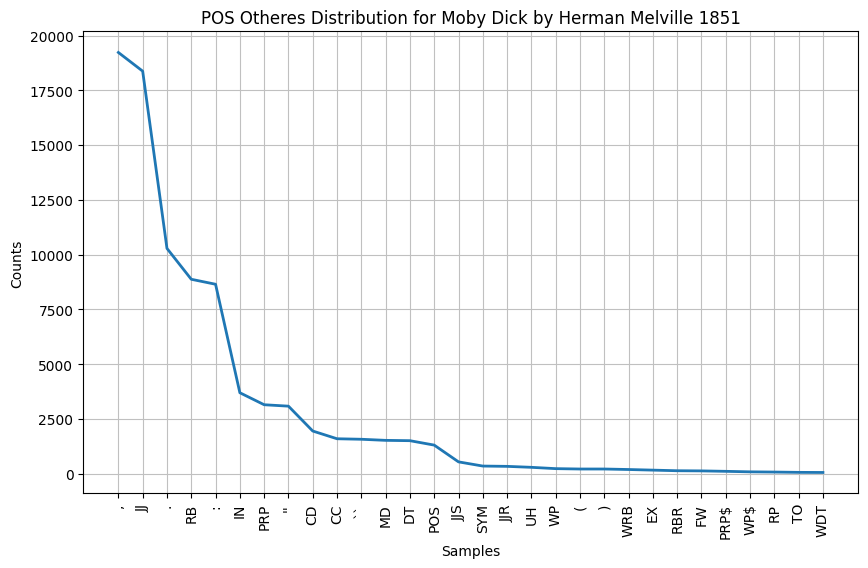

Most common nouns: [('whale', 555), ('man', 508), ('Ahab', 499), ('ship', 420), ('sea', 408)]
Most common verbs: [('said', 302), ('seemed', 275), ('say', 233), ('see', 193), ('made', 178)]
Most common others: [(',', 19229), ('.', 7514), (';', 4173), ("'", 2894), ('-', 2555)]
Generated sentence: Moby see [


Generalized nouns: []
Generalized verbs: ['express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'be', 'be', 'be', 'appear', 'seem', 'opportunity', 'chance', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'seat', 'perceive', 'comprehend', 'experience', 'see', 'go

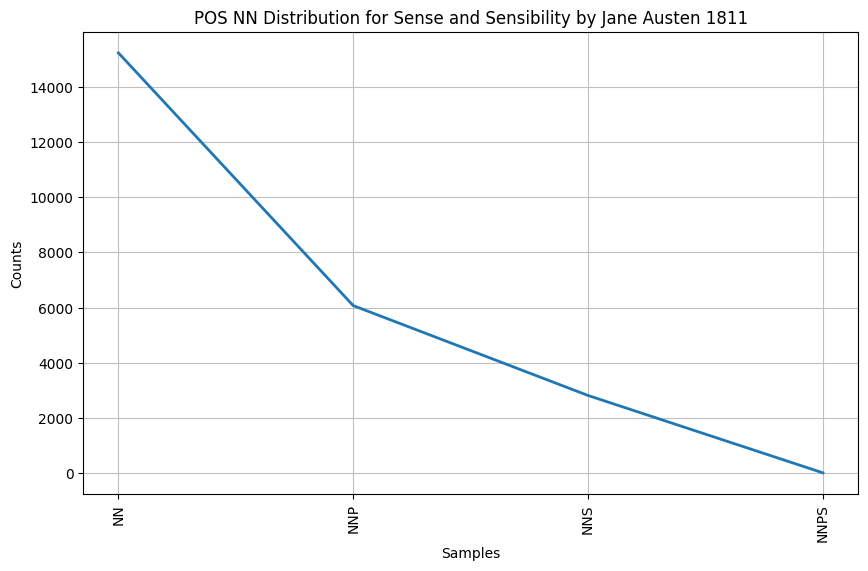

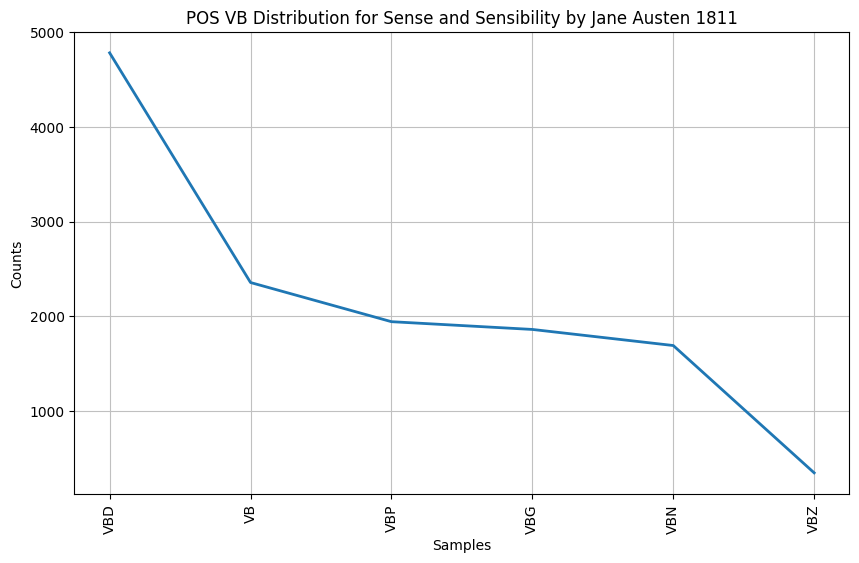

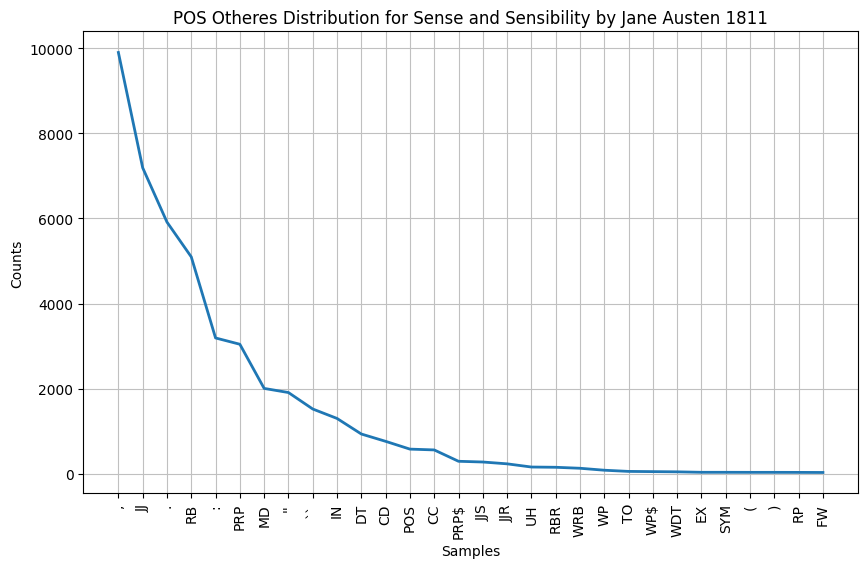

Most common nouns: [('Elinor', 674), ('Marianne', 565), ('Mrs', 530), ('Edward', 262), ('Dashwood', 252)]
Most common verbs: [('said', 397), ('know', 198), ('think', 190), ('say', 145), ('made', 138)]
Most common others: [(',', 9901), ('.', 4902), ('I', 2004), (';', 1572), ("''", 1564)]
Generated sentence: Sense settled [


Generalized nouns: ['halogen', 'chemical_element', 'element', 'digit', 'figure', 'letter', 'letter_of_the_alphabet', 'alphabetic_character']
Generalized verbs: ['express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'knowing', 'experience', 'see', 'go_through', 'accept', 'copulate', 'mate', 'pair', 'couple', 'recognize', 'recognise', 'realize', 'realise', 'agnize', 'agnise', 'distinguish', 'separate', 'differentiate', 'secern', 'secernate', 'severalize', 'seve

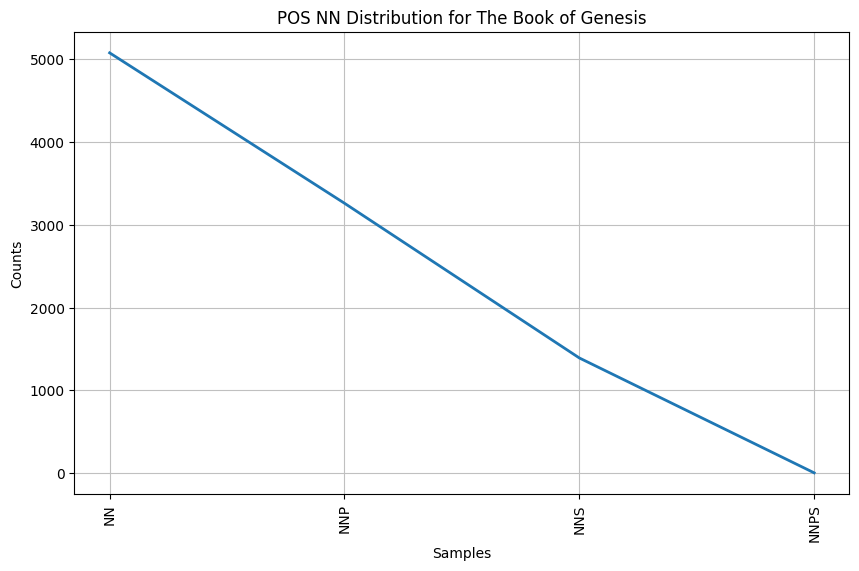

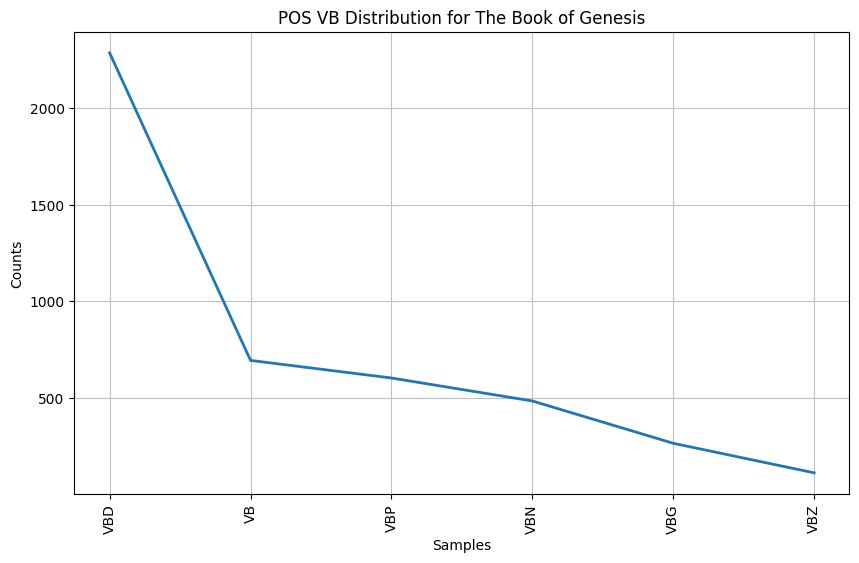

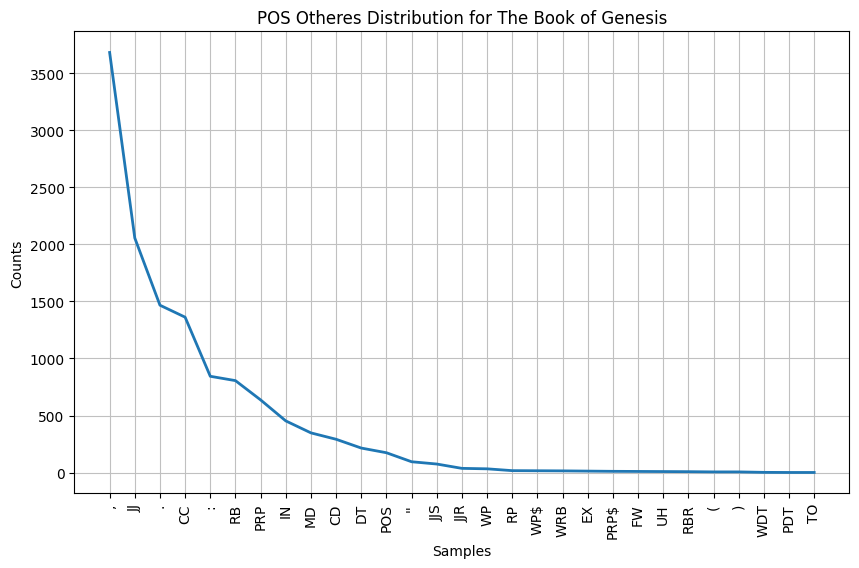

Most common nouns: [('God', 229), ('Jacob', 179), ('land', 163), ('LORD', 163), ('Joseph', 157)]
Most common verbs: [('said', 476), ('came', 177), ('went', 110), ('called', 98), ('took', 81)]
Most common others: [(',', 3682), ('.', 1316), ('And', 1250), (';', 606), ('unto', 505)]
Generated sentence: God beginning In


Generalized nouns: []
Generalized verbs: ['express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'travel', 'go', 'move', 'locomote', 'happen', 'hap', 'go_on', 'pass_off', 'occur', 'pass', 'fall_out', 'come_about', 'take_place', 'change', 'originate', 'arise', 'rise', 'develop', 'uprise', 'spring_up', 'grow', 'exist', 'be', 'be', 'run', 'go', 'pass', 'lead', 'extend', 'be', 'travel', 'go', 'move', 'locomote', 'be', 'result', 'ensue', 'be', 'become', 'turn', 'arrive',

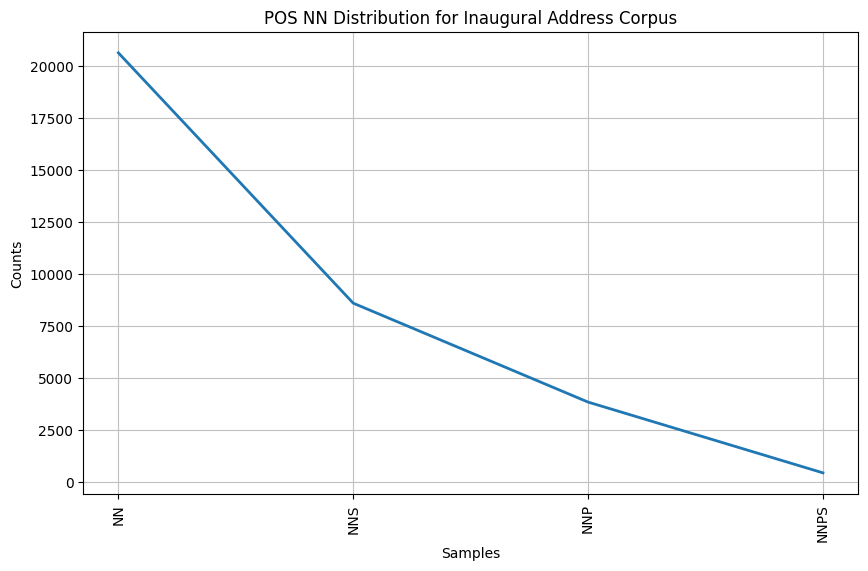

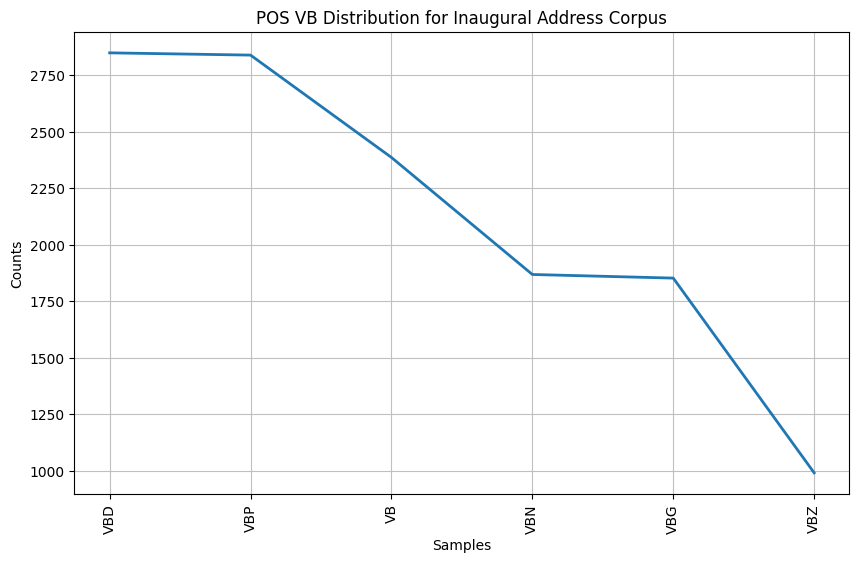

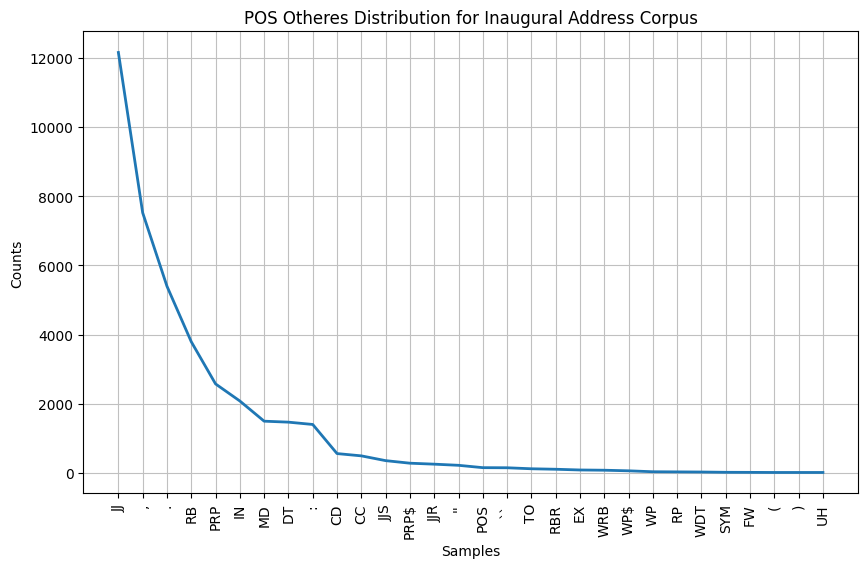

Most common nouns: [('people', 597), ('world', 337), ('States', 333), ('Government', 333), ('country', 330)]
Most common verbs: [('made', 158), ('make', 133), ('know', 102), ('let', 80), ('believe', 78)]
Most common others: [(',', 7523), ('.', 5262), ('I', 915), ('The', 645), ('We', 583)]
Generated sentence: Fellow Representatives -


Generalized nouns: ['halogen', 'chemical_element', 'element', 'digit', 'figure', 'letter', 'letter_of_the_alphabet', 'alphabetic_character']
Generalized verbs: ['change', 'alter', 'modify', 'make', 'create', 'create_by_mental_act', 'create_mentally', 'cause', 'do', 'make', 'make', 'create', 'get', 'acquire', 'create', 'make', 'constitute', 'represent', 'make_up', 'comprise', 'be', 'achieve', 'accomplish', 'attain', 'reach', 'become', 'create_from_raw_material', 'create_from_raw_stuff', 'perform', 'execute', 'do', 'make', 'create', 'change', 'alter', 'modify', 'act', 'behave', 'do', 'appoint', 'charge', 'score', 'hit', 'tally', 'rack_up', 'make', 'create',

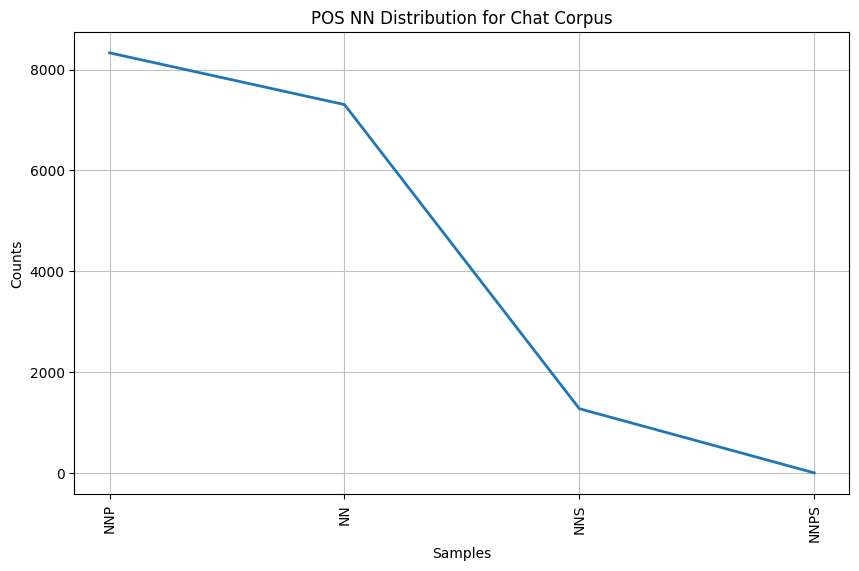

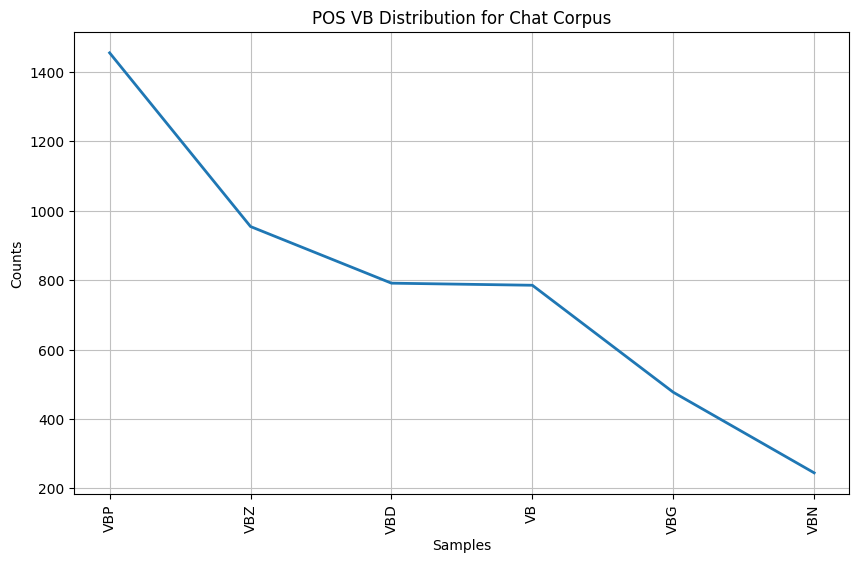

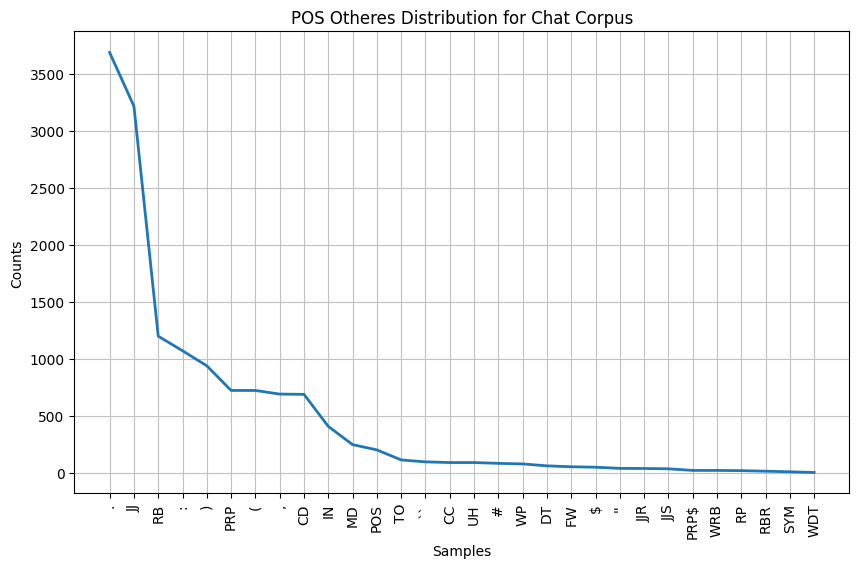

Most common nouns: [('JOIN', 1014), ('PART', 1006), ('hi', 396), ('ACTION', 340), ('lol', 325)]
Most common verbs: [('lol', 167), ("'m", 135), ('know', 90), ('hi', 83), ('got', 79)]
Most common others: [('.', 1437), ('!', 1145), ('?', 1103), (')', 938), ('(', 722)]
Generated sentence: im left gay


Generalized nouns: []
Generalized verbs: ['knowing', 'experience', 'see', 'go_through', 'accept', 'copulate', 'mate', 'pair', 'couple', 'recognize', 'recognise', 'realize', 'realise', 'agnize', 'agnise', 'distinguish', 'separate', 'differentiate', 'secern', 'secernate', 'severalize', 'severalise', 'tell', 'tell_apart', 'remember', 'retrieve', 'recall', 'call_back', 'call_up', 'recollect', 'think', 'greeting', 'salutation', 'change_state', 'turn', 'make', 'get', 'change', 'transmit', 'transfer', 'transport', 'channel', 'channelize', 'channelise', 'undergo', 'get_even', 'get_back', 'score', 'hit', 'tally', 'rack_up', 'seize', 'prehend', 'clutch', 'change', 'sicken', 'come_down', 'communicate',

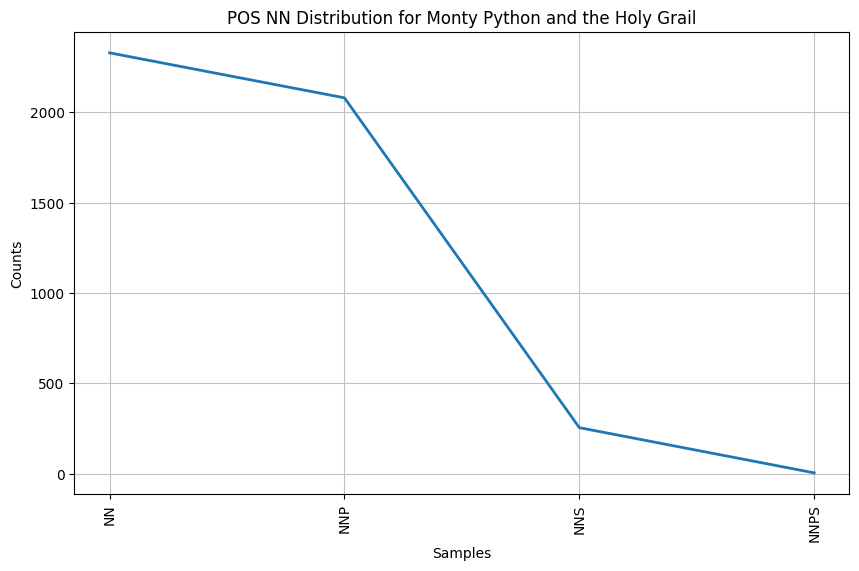

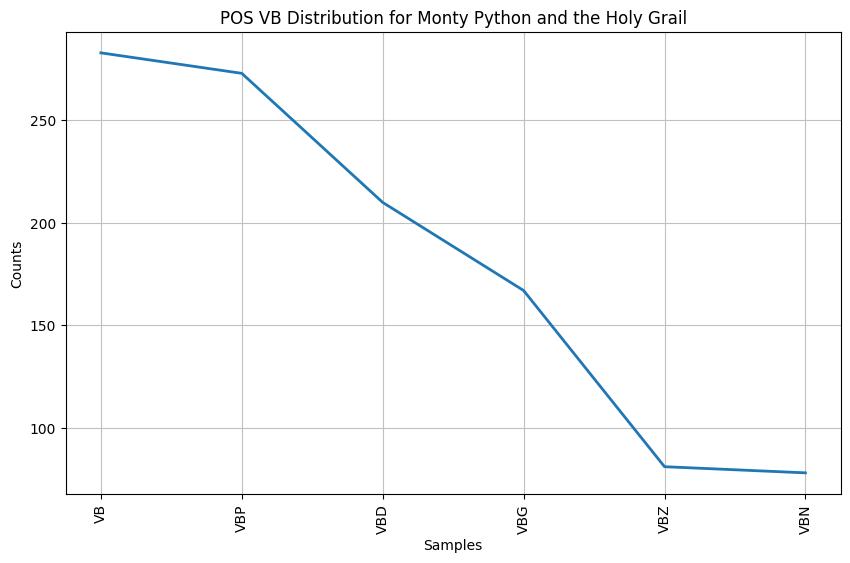

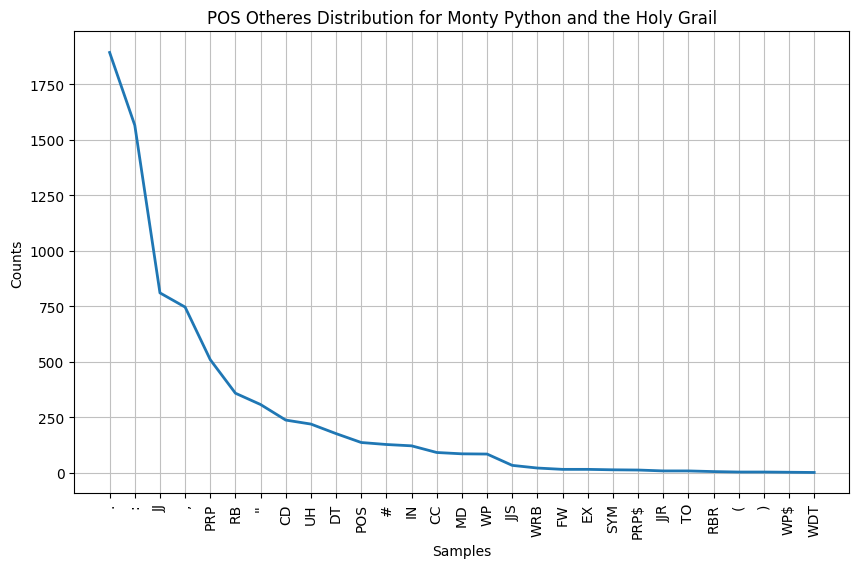

Most common nouns: [(']', 243), ('ARTHUR', 225), ('[', 222), ('LAUNCELOT', 72), ('KNIGHT', 68)]
Most common verbs: [('singing', 30), ('got', 27), ('going', 22), ('go', 21), ('think', 17)]
Most common others: [(':', 1197), ('.', 840), ('!', 830), (',', 746), ("'", 445)]
Generated sentence: SCENE goes 1


Generalized nouns: []
Generalized verbs: ['vocal_music', 'musical_performance', 'disclosure', 'revelation', 'revealing', 'interpret', 'render', 'sing', 'talk', 'speak', 'utter', 'mouth', 'verbalize', 'verbalise', 'utter', 'emit', 'let_out', 'let_loose', 'sound', 'go', 'unwrap', 'disclose', 'let_on', 'bring_out', 'reveal', 'discover', 'expose', 'divulge', 'break', 'give_away', 'let_out', 'char', 'blacken', 'sear', 'scorch', 'burn', 'combust', 'change_state', 'turn', 'make', 'get', 'change', 'transmit', 'transfer', 'transport', 'channel', 'channelize', 'channelise', 'undergo', 'get_even', 'get_back', 'score', 'hit', 'tally', 'rack_up', 'seize', 'prehend', 'clutch', 'change', 'sicken', 'co

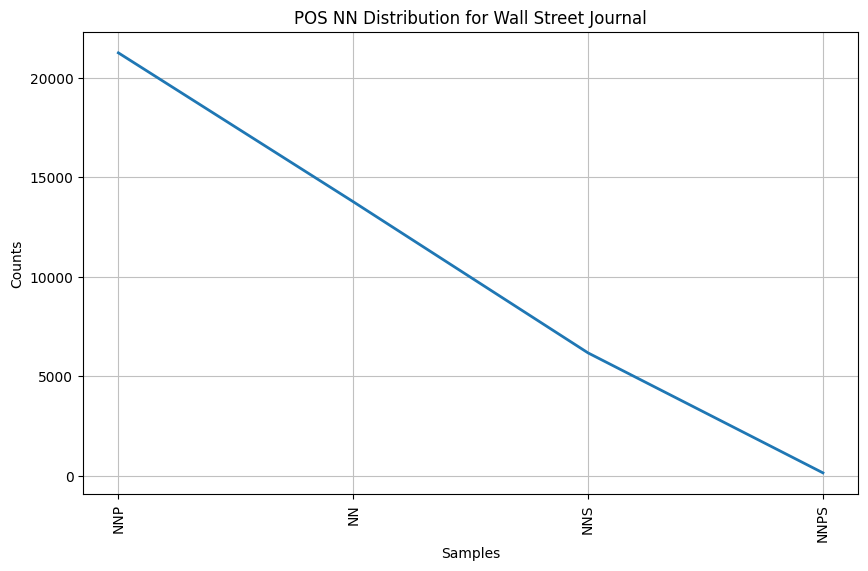

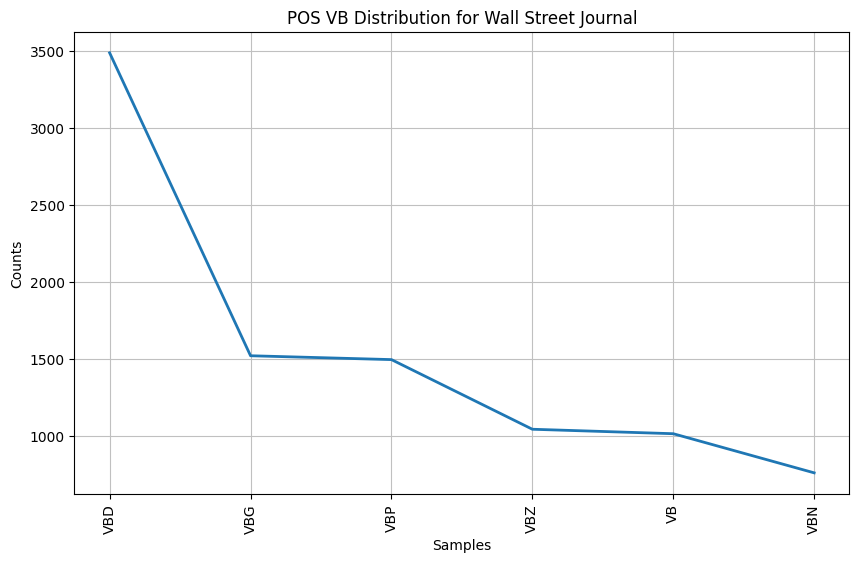

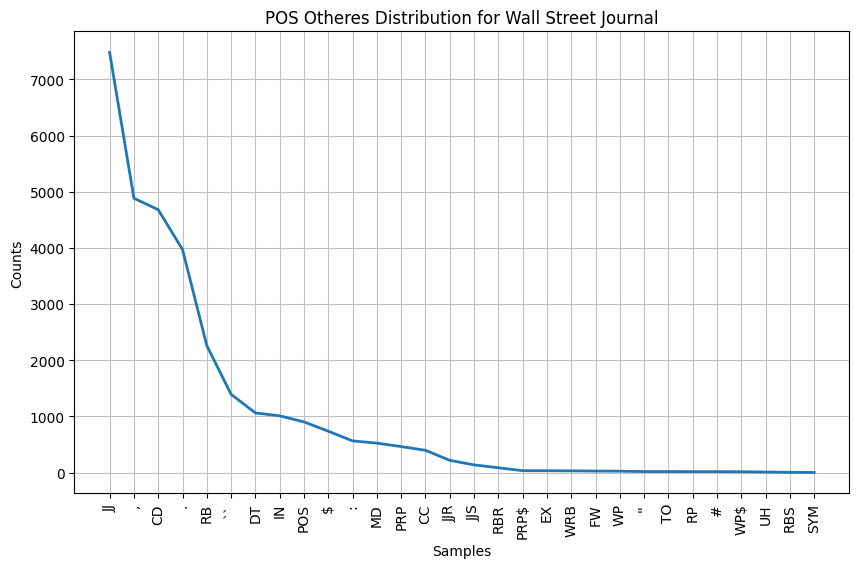

Most common nouns: [('*', 6265), ('-1', 1918), ('T', 1613), ('U', 744), ('-2', 712)]
Most common verbs: [('said', 628), ('*', 559), ('says', 210), ('say', 75), ('make', 71)]
Most common others: [(',', 4885), ('.', 3881), ('``', 1383), ('*', 1281), ('0', 1098)]
Generated sentence: Pierre join ,


Generalized nouns: ['digit', 'figure']
Generalized verbs: ['express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'opportunity', 'chance', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'assert', 'asseverate', 'maintain', 'speculate', 'have', 'feature', 'request', 'convey', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 'recite', 'read', 'register', 'show', 'record', 'opportunity', 'chance', 'express', 'verbalize', 'verbalise', 'utter', 'give_tongue_to', 

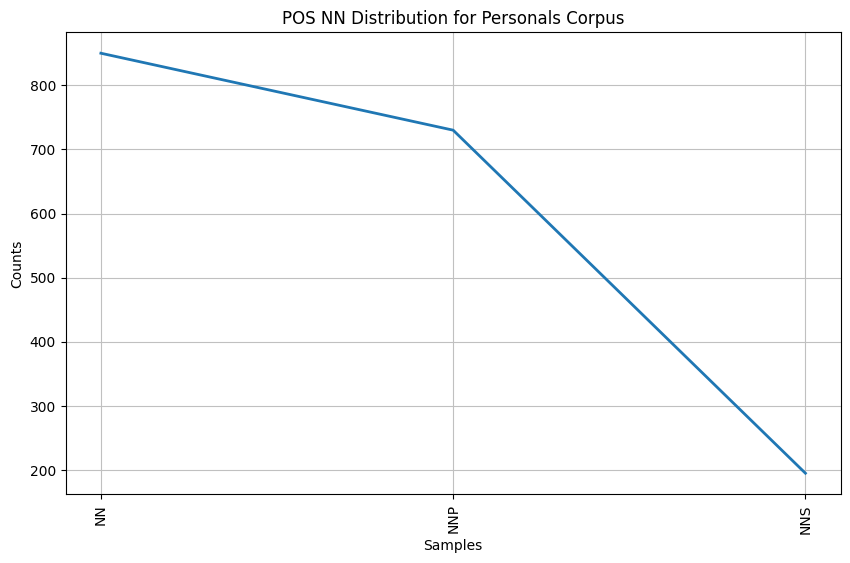

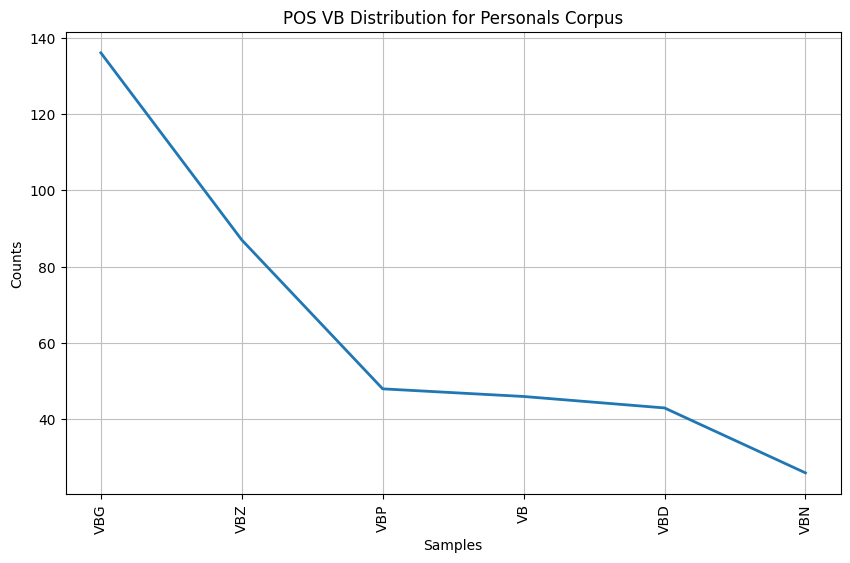

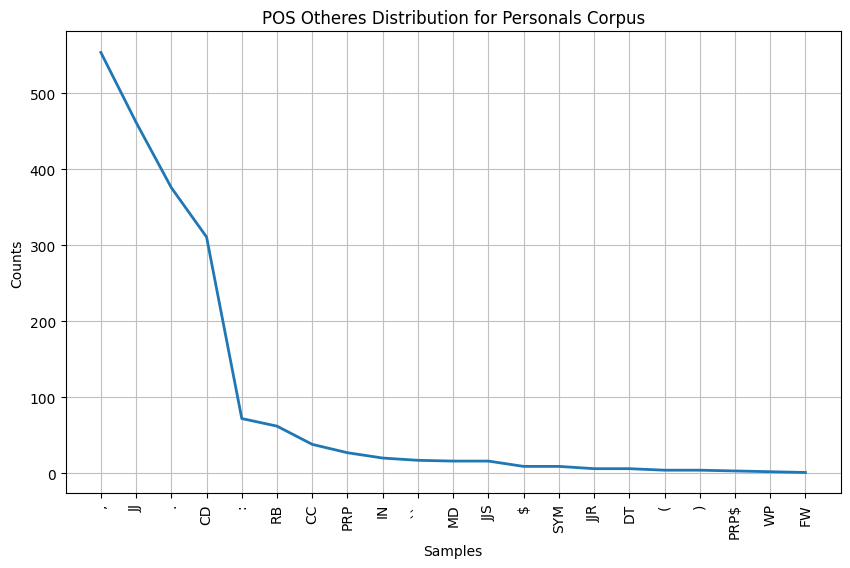

Most common nouns: [('/', 97), ('lady', 49), ('S', 36), ('ship', 33), ('relationship', 29)]
Most common verbs: [('seeks', 47), ('looking', 18), ('dining', 15), ('seeking', 14), ('like', 13)]
Most common others: [(',', 554), ('.', 364), ('-', 66), ('&', 30), ('50', 23)]
Generated sentence: SEXY seeks 25


Generalized nouns: ['large_integer']
Generalized verbs: ['movement', 'motion', 'desire', 'want', 'act', 'move', 'travel', 'go', 'move', 'locomote', 'request', 'sensing', 'perception', 'search', 'hunt', 'hunting', 'be', 'be', 'examine', 'see', 'lie', 'care', 'give_care', 'convey', 'match', 'fit', 'correspond', 'check', 'jibe', 'gibe', 'tally', 'agree', 'trust', 'swear', 'rely', 'bank', 'eating', 'feeding', 'eat', 'feed', 'give', 'sound', 'go', 'inculcate', 'instill', 'infuse', 'search', 'hunt', 'hunting', 'attempt', 'effort', 'endeavor', 'endeavour', 'try', 'desire', 'want', 'act', 'move', 'travel', 'go', 'move', 'locomote', 'request', 'kind', 'sort', 'form', 'variety', 'kind', 'sort', 

In [246]:
for text in [text1, text2, text3, text4, text5, text6, text7, text8]:
    analyze_text_v3(text)



Porównaj wyniki z zdań 5,6,7 i określ co dało poprawę wyników, co nie  i dlaczego ?



### <span style="color: red">Zadanie 8 [dodatkowe] : dane w języku polskim</span> 🦥

Powtórz zadania 5,6,7 dla trzech plików tekstowych w języku polskim 

Pliki "txt" zostały dołączone do zadania 

In [249]:
# kod zadania 8
with open("lab11_tekst1.txt", "r") as file:
    tekst1 = file.read()
with open("lab11_tekst2.txt", "r") as file:
    tekst2 = file.read()
with open("lab11_tekst3.txt", "r") as file:
    tekst3 = file.read()

In [ ]:
print(tekst1)
print(tekst2)
print(tekst3)

W nowoczesnych fabrykach coraz częściej stosuje się zaawansowane roboty przemysłowe, które automatyzują skomplikowane procesy produkcyjne. Dzięki nim zwiększa się nie tylko wydajność, ale również precyzja montażu i bezpieczeństwo pracowników. Inżynierowie stale udoskonalają algorytmy sterujące, aby maszyny mogły samodzielnie reagować na zmiany w środowisku pracy, wykrywać usterki i optymalizować zużycie energii. W wielu zakładach produkcyjnych wdraża się także systemy sztucznej inteligencji, które analizują dane w czasie rzeczywistym i wspierają podejmowanie decyzji. Przemysł 4.0 staje się rzeczywistością.
Regularna aktywność fizyczna wpływa korzystnie na zdrowie psychiczne i fizyczne człowieka. Codzienne spacery, jazda na rowerze, pływanie czy ćwiczenia siłowe pomagają redukować stres, poprawiają jakość snu i wspomagają układ odpornościowy. Lekarze i fizjoterapeuci zalecają co najmniej 30 minut umiarkowanego ruchu dziennie, aby utrzymać dobrą kondycję i zapobiegać chorobom cywilizacyj